# Predição de regiões promotores (Bacillus subtilis)

# Importação das bibliotecas e módulos do Python

In [47]:
import numpy as np
import re
import pandas as pd
import collections
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf 
import tensorflow.compat.v1 as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score
print (tf.keras.__version__)

2.2.4-tf


# Importação do conjunto de dados

In [48]:
atributos = ['Sequencia', 'Classe']
df = pd.read_csv('promotores_bd.csv', names=atributos)
X = df[df.columns.difference(['Classe'])].values
y = df['Classe'].values
class_names = df['Classe'].unique()

# Análise dos dados

In [3]:
# Dimensão do dataset (linhas; colunas):

print("O conjunto de dados possui como linhas;colunas:", df.shape)

O conjunto de dados possui como linhas;colunas: (540, 2)


In [4]:
# Impressão de apenas as duas primeiras linhas

print(df.head(2)) 

                                           Sequencia Classe
0  CGCTCTATCCTGGGTTTTTGGCTGTGCCAAAAGGGAATAATGAAAA...      +
1  GTTTCCCTTATTTTTTGATAAAAGGCTTCCGAAGAAACGTAACTGT...      +


In [5]:
# Observação das colunas(atributos) presentes no conjunto de dados e análise da quantidade de instâncias,a presença de valores nulos e os tipos dos dados em cada atributo:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sequencia  540 non-null    object
 1   Classe     540 non-null    object
dtypes: object(2)
memory usage: 8.6+ KB


# Análise dos dados: distribuição das instâncias em relação às classes

Distribuição das instâncias entre as classes:
-    0.5
+    0.5
Name: Classe, dtype: float64


c:\users\bia\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


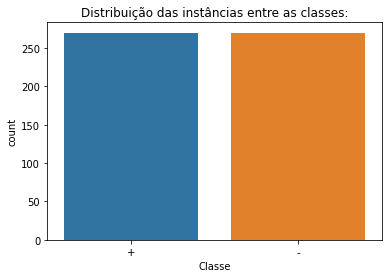

<Figure size 432x288 with 0 Axes>

In [6]:
print("Distribuição das instâncias entre as classes:")
print(df.Classe.value_counts() / df.shape[0])

fig, ax = plt.subplots()
sb.countplot('Classe', data=df, ax=ax)
ax.set_title("Distribuição das instâncias entre as classes:")
plt.show()
plt.savefig("distr_classes.png")

# Análise dos dados: distribuição das instâncias em relação aos atributos

In [7]:
# Definição para a contagem da frequência para uma única amostra:

def count_freq(seq):
    count = collections.Counter(seq)
    return count

In [8]:
# Avaliação da frequência de bases em cada instância a partir da construção de uma matriz, em que:
# colunas = freq. de A, T, C, G
# linhas = cada uma das instâncias do conjunto de dados

seqs = df["Sequencia"].values
freqs = []
for seq in seqs:
    c = count_freq(seq)
    linha = [c['A'], c['T'], c['C'], c['G']]
    freqs.append(linha)

# Transformação para um array numpy e visualização das primeiras linhas:

freqs = np.asarray(freqs)
freqs[:10]

array([[26, 27, 11, 17],
       [24, 27, 10, 20],
       [27, 32,  6, 16],
       [23, 33,  9, 16],
       [27, 32, 11, 11],
       [29, 30, 12, 10],
       [37, 19, 12, 13],
       [28, 27, 15, 11],
       [25, 28, 14, 14],
       [35, 26,  9, 11]])

In [49]:
# Conversão dos valores dos rótulos de classe para a construção dos gráficos:

novo_y = LabelEncoder().fit_transform(y)
print("antes:", df["Classe"].values[265:275])
print("depois:", novo_y[265:275])

antes: ['+' '+' '+' '+' '+' '-' '-' '-' '-' '-']
depois: [0 0 0 0 0 1 1 1 1 1]


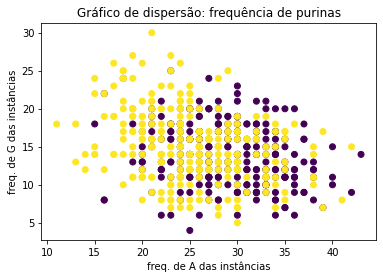

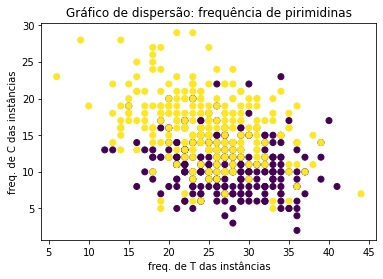

In [10]:
# Construção do gráfico de dispersão para as purinas (bases A e G):

ya = freqs[:, 0]  # seleção de todas as linhas da primeira coluna ("A")
yg = freqs[:, 3]  # seleção de todas as linhas da última coluna ("G")

plt.scatter(ya, yg, c=novo_y)
plt.title("Gráfico de dispersão: frequência de purinas")
plt.xlabel("freq. de A das instâncias")
plt.ylabel("freq. de G das instâncias")
plt.show()

# Construção do gráfico de dispersão para as pirimidinas (bases T e C):

yt = freqs[:, 1]  # seleção de todas as linhas da primeira coluna ("T")
yc = freqs[:, 2]  # seleção de todas as linhas da última coluna ("C")

plt.scatter(yt, yc, c=novo_y)
plt.title("Gráfico de dispersão: frequência de pirimidinas")
plt.xlabel("freq. de T das instâncias")
plt.ylabel("freq. de C das instâncias")
plt.show()

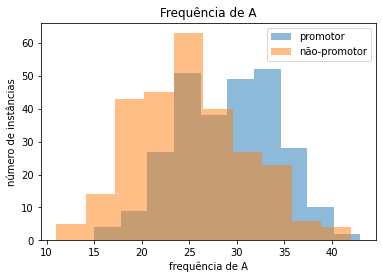

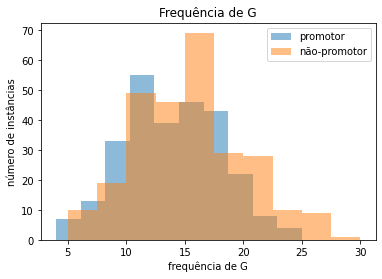

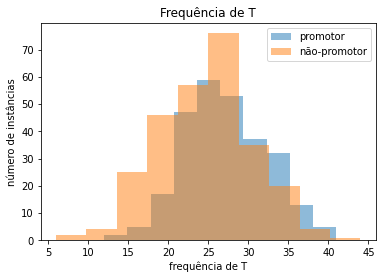

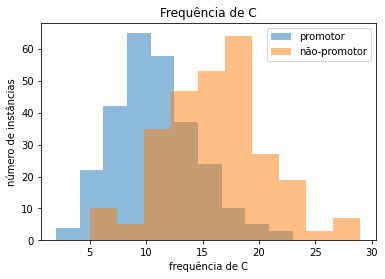

In [50]:
# Construção do histograma a partir da seleção de apenas amostras da classe '+' e '-':

prmt = np.where(df["Classe"].values == '+')[0]
notprmt = np.where(df["Classe"].values == '-')[0]

# Considerando apenas a base ("A"):
y_prmt = freqs[:, 0][prmt]
y_notprmt = freqs[:, 0][notprmt]

plt.hist(y_prmt, alpha=0.5, label='promotor')
plt.hist(y_notprmt, alpha=0.5, label='não-promotor')
plt.title("Frequência de A")
plt.legend(loc='upper right')
plt.xlabel("frequência de A")
plt.ylabel("número de instâncias")
plt.show()


# Considerando apenas a base ("G"):
y_prmt = freqs[:, 3][prmt]
y_notprmt = freqs[:, 3][notprmt]

plt.hist(y_prmt, alpha=0.5, label='promotor')
plt.hist(y_notprmt, alpha=0.5, label='não-promotor')
plt.title("Frequência de G")
plt.legend(loc='upper right')
plt.xlabel("frequência de G")
plt.ylabel("número de instâncias")
plt.show()

# Considerando apenas a base ("T"):
y_prmt = freqs[:, 1][prmt]
y_notprmt = freqs[:, 1][notprmt]

plt.hist(y_prmt, alpha=0.5, label='promotor')
plt.hist(y_notprmt, alpha=0.5, label='não-promotor')
plt.title("Frequência de T")
plt.legend(loc='upper right')
plt.xlabel("frequência de T")
plt.ylabel("número de instâncias")
plt.show()


# Considerando apenas a base ("C"):
y_prmt = freqs[:, 2][prmt]
y_notprmt = freqs[:, 2][notprmt]

plt.hist(y_prmt, alpha=0.5, label='promotor')
plt.hist(y_notprmt, alpha=0.5, label='não-promotor')
plt.title("Frequência de C")
plt.legend(loc='upper right')
plt.xlabel("frequência de C")
plt.ylabel("número de instâncias")
plt.show()

In [51]:
# Função para a criação de um array NumPy a partir de uma sequência de caracteres
def string_to_array(string):
    string = string[0]
    seq_array = []
    for i in range(0, len(string)):
        if(string[i] == 'a' or string[i] == 'A'):
            seq_array.append(0.25)
        elif(string[i] == 'c' or string[i] == 'C'):
            seq_array.append(0.5)
        elif(string[i] == 'g' or string[i] == 'G'):
            seq_array.append(0.75)
        elif(string[i] == 't' or string[i] == 'T'):
            seq_array.append(1.0)
        else:
            seq_array.append(0.0)
    return seq_array

# Função para a conversão de array em um objeto de matriz NumPy a partir de uma sequência de caracteres
def create_matrix(X):
    linhas_em_arrays = []
    for i in range(0,X.shape[0]):
        linhas_em_arrays.append(string_to_array(X[i]))
    return np.asarray(linhas_em_arrays)

In [52]:
novo_X = create_matrix (X)
print(novo_X.shape)

(540, 81)


# Construção e treinamento de Rede Neural de Multicamadas

# Conjunto de treinamento = 80% dos dados
Divisão do conjunto de dados em conjunto de treinamento (80%) e conjunto de teste (20%):

In [14]:
# Para o processo pseudo-aleatório de divisão dos grupos, a semente foi fixada em 0.

X_train, X_test, Y_train, Y_test = train_test_split(novo_X, novo_y, test_size = 0.2, random_state = 0)


In [15]:
print("(Quantidade de exemplos, quantidade de atributos) dos conjuntos de treinamento e teste: ")
X_train.shape, X_test.shape

(Quantidade de exemplos, quantidade de atributos) dos conjuntos de treinamento e teste: 


((432, 81), (108, 81))

# Fase de construção da Rede Neural de Multicamadas:

Camada neural oculta com 1 neurônio

In [16]:
# Construção da arquitetura da Rede Neural com 3 camadas neurais utilizando o modelo Keras:

modelo = tf.keras.Sequential()
modelo.add(tf.keras.layers.Dense(1, input_dim=81, activation='relu')) # construção da[e 1 camada de entrada e 1 camada neural oculta contendo 5 neurônios + função de ativação ReLu
modelo.add(tf.keras.layers.Dense(1, activation='sigmoid')) # 1 camada neural de saída contendo 1 neurônio + função de ativação Sigmóide.

# Compilação do modelo para treinamento e predições utilizando o hardware:
modelo.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


# Fase de execução da RNM:

In [17]:
# Treinamento da RNM construída:

history1_1 = modelo.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 1s 3ms/sample - loss: 0.7591 - accuracy: 0.6111 - val_loss: 1.1959 - val_accuracy: 0.0370
Epoch 2/150
432/432 [==============================] - 0s 315us/sample - loss: 0.6755 - accuracy: 0.6019 - val_loss: 1.0746 - val_accuracy: 0.0741
Epoch 3/150
432/432 [==============================] - 0s 359us/sample - loss: 0.6693 - accuracy: 0.5972 - val_loss: 0.9880 - val_accuracy: 0.1389
Epoch 4/150
432/432 [==============================] - 0s 313us/sample - loss: 0.6639 - accuracy: 0.6042 - val_loss: 1.0096 - val_accuracy: 0.1204
Epoch 5/150
432/432 [==============================] - 0s 352us/sample - loss: 0.6582 - accuracy: 0.6134 - val_loss: 1.0162 - val_accuracy: 0.1111
Epoch 6/150
432/432 [==============================] - 0s 359us/sample - loss: 0.6529 - accuracy: 0.6157 - val_loss: 1.0471 - val_accuracy: 0.0833
Epoch 7/150
432/432 [==============================] - 0s 352us/sample - l

In [18]:
# Treinamento da RNM construída:

history1_2 = modelo.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 0s 278us/sample - loss: 0.3839 - accuracy: 0.8519 - val_loss: 1.1993 - val_accuracy: 0.4444
Epoch 2/150
432/432 [==============================] - 0s 278us/sample - loss: 0.3840 - accuracy: 0.8380 - val_loss: 1.1375 - val_accuracy: 0.5093
Epoch 3/150
432/432 [==============================] - 0s 310us/sample - loss: 0.3847 - accuracy: 0.8449 - val_loss: 1.2432 - val_accuracy: 0.4259
Epoch 4/150
432/432 [==============================] - 0s 303us/sample - loss: 0.3846 - accuracy: 0.8310 - val_loss: 1.0667 - val_accuracy: 0.5556
Epoch 5/150
432/432 [==============================] - 0s 296us/sample - loss: 0.3855 - accuracy: 0.8264 - val_loss: 1.0719 - val_accuracy: 0.5463
Epoch 6/150
432/432 [==============================] - 0s 315us/sample - loss: 0.3846 - accuracy: 0.8356 - val_loss: 1.1293 - val_accuracy: 0.5185
Epoch 7/150
432/432 [==============================] - 0s 301us/sample -

In [19]:
# Treinamento da RNM construída:

history1_3 = modelo.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 0s 333us/sample - loss: 0.3657 - accuracy: 0.8403 - val_loss: 1.0720 - val_accuracy: 0.6204
Epoch 2/150
432/432 [==============================] - 0s 389us/sample - loss: 0.3672 - accuracy: 0.8426 - val_loss: 1.1521 - val_accuracy: 0.6019
Epoch 3/150
432/432 [==============================] - 0s 315us/sample - loss: 0.3686 - accuracy: 0.8356 - val_loss: 1.2990 - val_accuracy: 0.5556
Epoch 4/150
432/432 [==============================] - 0s 352us/sample - loss: 0.3668 - accuracy: 0.8333 - val_loss: 1.1650 - val_accuracy: 0.6019
Epoch 5/150
432/432 [==============================] - 0s 364us/sample - loss: 0.3684 - accuracy: 0.8380 - val_loss: 1.2257 - val_accuracy: 0.5926
Epoch 6/150
432/432 [==============================] - 0s 345us/sample - loss: 0.3658 - accuracy: 0.8472 - val_loss: 1.3752 - val_accuracy: 0.5463
Epoch 7/150
432/432 [==============================] - 0s 380us/sample -

In [20]:
# Treinamento da RNM construída:

history1_4 = modelo.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 0s 364us/sample - loss: 0.3644 - accuracy: 0.8426 - val_loss: 1.0890 - val_accuracy: 0.6296
Epoch 2/150
432/432 [==============================] - 0s 320us/sample - loss: 0.3621 - accuracy: 0.8495 - val_loss: 1.4463 - val_accuracy: 0.5463
Epoch 3/150
432/432 [==============================] - 0s 320us/sample - loss: 0.3651 - accuracy: 0.8449 - val_loss: 1.3188 - val_accuracy: 0.5741
Epoch 4/150
432/432 [==============================] - 0s 331us/sample - loss: 0.3621 - accuracy: 0.8403 - val_loss: 1.3379 - val_accuracy: 0.5741
Epoch 5/150
432/432 [==============================] - 0s 364us/sample - loss: 0.3653 - accuracy: 0.8380 - val_loss: 1.2682 - val_accuracy: 0.5833
Epoch 6/150
432/432 [==============================] - 0s 331us/sample - loss: 0.3643 - accuracy: 0.8287 - val_loss: 1.4414 - val_accuracy: 0.5463
Epoch 7/150
432/432 [==============================] - 0s 387us/sample -

In [21]:
# Treinamento da RNM construída:

history1_5 = modelo.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 0s 396us/sample - loss: 0.3660 - accuracy: 0.8380 - val_loss: 1.3219 - val_accuracy: 0.5648
Epoch 2/150
432/432 [==============================] - 0s 343us/sample - loss: 0.3643 - accuracy: 0.8356 - val_loss: 1.4617 - val_accuracy: 0.5370
Epoch 3/150
432/432 [==============================] - 0s 361us/sample - loss: 0.3627 - accuracy: 0.8472 - val_loss: 1.4361 - val_accuracy: 0.5370
Epoch 4/150
432/432 [==============================] - 0s 364us/sample - loss: 0.3629 - accuracy: 0.8449 - val_loss: 1.3359 - val_accuracy: 0.5648
Epoch 5/150
432/432 [==============================] - 0s 354us/sample - loss: 0.3609 - accuracy: 0.8426 - val_loss: 1.2765 - val_accuracy: 0.5833
Epoch 6/150
432/432 [==============================] - 0s 391us/sample - loss: 0.3622 - accuracy: 0.8380 - val_loss: 1.4810 - val_accuracy: 0.5370
Epoch 7/150
432/432 [==============================] - 0s 371us/sample -

In [119]:
# Média das acurácias máximas obtidas com o modelo 1:

Acc_media = (max(history1_1.history['accuracy']) + max(history1_2.history['accuracy']) +  max(history1_3.history['accuracy'])  + max(history1_4.history['accuracy']) + max(history1_5.history['accuracy'])) /5
print ("Acurácia do treinamento obtida para o modelo 1:", Acc_media)

Val_Acc_media = (max(history1_1.history['val_accuracy']) + max(history1_2.history['val_accuracy'])  +  max(history1_3.history['val_accuracy'])  + max(history1_4.history['val_accuracy']) + max(history1_5.history['val_accuracy'])) /5
print ("Acurácia do teste obtida para o modelo 1:", Val_Acc_media)


# Média da função de custo máximas obtidas com o modelo 1:

Loss_media = (max(history1_1.history['loss']) + max(history1_2.history['loss']) +  max(history1_3.history['loss'])  + max(history1_4.history['loss']) + max(history1_5.history['loss'])) /5
print ("Função de custo do treinamento obtida para o modelo 1:", Loss_media)

Val_Loss_media = (max(history1_1.history['val_loss']) + max(history1_2.history['val_loss'])  +  max(history1_3.history['val_loss'])  + max(history1_4.history['val_loss']) + max(history1_5.history['val_loss'])) /5
print ("Função de custo do teste obtida para o modelo 1:", Val_Loss_media)

Acurácia do treinamento obtida para o modelo 1: 0.8560185432434082
Acurácia do teste obtida para o modelo 1: 0.6351851463317871
Função de custo do treinamento obtida para o modelo 1: 0.4498381688983904
Função de custo do teste obtida para o modelo 1: 1.5061871515380012


# Fase de construção da 2ª Rede Neural de Multicamadas:

Camada neural oculta com 2 neurônios

In [24]:
# Construção da arquitetura da Rede Neural com 3 camadas neurais utilizando o modelo Keras:

modelo2 = tf.keras.Sequential()
modelo2.add(tf.keras.layers.Dense(2, input_dim=81, activation='relu')) # construção da[e 1 camada de entrada e 1 camada neural oculta contendo 5 neurônios + função de ativação ReLu
modelo2.add(tf.keras.layers.Dense(1, activation='sigmoid')) # 1 camada neural de saída contendo 1 neurônio + função de ativação Sigmóide.

# Compilação do modelo para treinamento e predições utilizando o hardware:
modelo2.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


# Fase de execução da 2ª RNM:

In [25]:
# Treinamento e predição da RNM construída:

history2_1 = modelo2.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 1s 3ms/sample - loss: 0.6679 - accuracy: 0.6250 - val_loss: 0.9456 - val_accuracy: 0.0000e+00
Epoch 2/150
432/432 [==============================] - 0s 292us/sample - loss: 0.6630 - accuracy: 0.6250 - val_loss: 0.9854 - val_accuracy: 0.0000e+00
Epoch 3/150
432/432 [==============================] - 0s 324us/sample - loss: 0.6594 - accuracy: 0.6250 - val_loss: 0.9526 - val_accuracy: 0.0000e+00
Epoch 4/150
432/432 [==============================] - 0s 331us/sample - loss: 0.6574 - accuracy: 0.6250 - val_loss: 0.9872 - val_accuracy: 0.0000e+00
Epoch 5/150
432/432 [==============================] - 0s 347us/sample - loss: 0.6542 - accuracy: 0.6250 - val_loss: 0.9968 - val_accuracy: 0.0000e+00
Epoch 6/150
432/432 [==============================] - 0s 338us/sample - loss: 0.6515 - accuracy: 0.6250 - val_loss: 0.9747 - val_accuracy: 0.0000e+00
Epoch 7/150
432/432 [=============================

In [27]:
# Treinamento e predição da RNM construída:

history2_2 = modelo2.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 0s 304us/sample - loss: 0.3673 - accuracy: 0.8449 - val_loss: 1.1795 - val_accuracy: 0.5648
Epoch 2/150
432/432 [==============================] - 0s 278us/sample - loss: 0.3669 - accuracy: 0.8380 - val_loss: 1.2543 - val_accuracy: 0.5093
Epoch 3/150
432/432 [==============================] - 0s 273us/sample - loss: 0.3636 - accuracy: 0.8542 - val_loss: 1.4173 - val_accuracy: 0.4537
Epoch 4/150
432/432 [==============================] - 0s 264us/sample - loss: 0.3685 - accuracy: 0.8426 - val_loss: 1.1789 - val_accuracy: 0.5648
Epoch 5/150
432/432 [==============================] - 0s 271us/sample - loss: 0.3669 - accuracy: 0.8403 - val_loss: 1.2462 - val_accuracy: 0.5185
Epoch 6/150
432/432 [==============================] - 0s 264us/sample - loss: 0.3647 - accuracy: 0.8449 - val_loss: 1.0356 - val_accuracy: 0.5833
Epoch 7/150
432/432 [==============================] - 0s 315us/sample -

In [28]:
# Treinamento e predição da RNM construída:

history2_3 = modelo2.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 0s 380us/sample - loss: 0.3631 - accuracy: 0.8449 - val_loss: 1.1589 - val_accuracy: 0.6019
Epoch 2/150
432/432 [==============================] - 0s 334us/sample - loss: 0.3659 - accuracy: 0.8403 - val_loss: 1.2349 - val_accuracy: 0.5648
Epoch 3/150
432/432 [==============================] - 0s 310us/sample - loss: 0.3620 - accuracy: 0.8403 - val_loss: 1.4141 - val_accuracy: 0.5000
Epoch 4/150
432/432 [==============================] - 0s 280us/sample - loss: 0.3648 - accuracy: 0.8519 - val_loss: 1.2927 - val_accuracy: 0.5463
Epoch 5/150
432/432 [==============================] - 0s 306us/sample - loss: 0.3625 - accuracy: 0.8519 - val_loss: 1.1010 - val_accuracy: 0.6019
Epoch 6/150
432/432 [==============================] - 0s 299us/sample - loss: 0.3645 - accuracy: 0.8472 - val_loss: 1.2750 - val_accuracy: 0.5463
Epoch 7/150
432/432 [==============================] - 0s 329us/sample -

In [30]:
# Treinamento e predição da RNM construída:

history2_4 = modelo2.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 0s 329us/sample - loss: 0.3584 - accuracy: 0.8495 - val_loss: 1.2313 - val_accuracy: 0.5926
Epoch 2/150
432/432 [==============================] - 0s 308us/sample - loss: 0.3571 - accuracy: 0.8472 - val_loss: 1.1275 - val_accuracy: 0.6019
Epoch 3/150
432/432 [==============================] - 0s 364us/sample - loss: 0.3602 - accuracy: 0.8403 - val_loss: 1.2911 - val_accuracy: 0.5833
Epoch 4/150
432/432 [==============================] - 0s 347us/sample - loss: 0.3571 - accuracy: 0.8495 - val_loss: 1.1827 - val_accuracy: 0.5926
Epoch 5/150
432/432 [==============================] - 0s 361us/sample - loss: 0.3590 - accuracy: 0.8542 - val_loss: 1.1809 - val_accuracy: 0.5926
Epoch 6/150
432/432 [==============================] - 0s 333us/sample - loss: 0.3570 - accuracy: 0.8426 - val_loss: 1.3782 - val_accuracy: 0.5463
Epoch 7/150
432/432 [==============================] - 0s 354us/sample -

In [31]:
# Treinamento e predição da RNM construída:

history2_5 = modelo2.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 0s 304us/sample - loss: 0.3558 - accuracy: 0.8472 - val_loss: 1.3592 - val_accuracy: 0.5463
Epoch 2/150
432/432 [==============================] - 0s 273us/sample - loss: 0.3579 - accuracy: 0.8495 - val_loss: 1.3517 - val_accuracy: 0.5648
Epoch 3/150
432/432 [==============================] - 0s 278us/sample - loss: 0.3602 - accuracy: 0.8472 - val_loss: 1.2609 - val_accuracy: 0.5926
Epoch 4/150
432/432 [==============================] - 0s 280us/sample - loss: 0.3550 - accuracy: 0.8565 - val_loss: 1.1529 - val_accuracy: 0.6111
Epoch 5/150
432/432 [==============================] - 0s 289us/sample - loss: 0.3539 - accuracy: 0.8472 - val_loss: 1.5991 - val_accuracy: 0.4722
Epoch 6/150
432/432 [==============================] - 0s 294us/sample - loss: 0.3602 - accuracy: 0.8542 - val_loss: 1.1522 - val_accuracy: 0.6111
Epoch 7/150
432/432 [==============================] - 0s 269us/sample -

In [120]:
# Média das acurácias máximas obtidas com o modelo 2:

Acc_media2 = (max(history2_1.history['accuracy']) + max(history2_2.history['accuracy']) + max(history2_3.history['accuracy'])  +  max(history2_4.history['accuracy'])  + max(history2_5.history['accuracy'])) /5
print ("Acurácia do treinamento obtida para o modelo 2:", Acc_media2)

Val_Acc_media2 = (max(history2_1.history['val_accuracy']) + max(history2_2.history['val_accuracy']) + max(history2_3.history['val_accuracy'])  +  max(history2_4.history['val_accuracy'])  + max(history2_5.history['val_accuracy'])) /5
print ("Acurácia do teste obtida para o modelo 2:", Val_Acc_media2)


# Média da máxima da função de custo obtida com o modelo 2:

Loss_media2 = (max(history2_1.history['loss']) + max(history2_2.history['loss']) + max(history2_3.history['loss'])  +  max(history2_4.history['loss'])  + max(history2_5.history['loss'])) /5
print ("Função de custo do treinamento obtida para o modelo 2:", Loss_media2)

Val_Loss_media2 = (max(history2_1.history['val_loss']) + max(history2_2.history['val_loss']) + max(history2_3.history['val_loss'])  +  max(history2_4.history['val_loss'])  + max(history2_5.history['val_loss'])) /5
print ("Função de custo do teste obtida para o modelo 2:", Val_Loss_media2)



Acurácia do treinamento obtida para o modelo 2: 0.8550926208496094
Acurácia do teste obtida para o modelo 2: 0.6055555820465088
Função de custo do treinamento obtida para o modelo 2: 0.42476316338611975
Função de custo do teste obtida para o modelo 2: 1.4478915241029529


# Fase de construção da 3ª Rede Neural de Multicamadas:

Camada neural oculta com 3 neurônios

In [53]:
# Construção da arquitetura da Rede Neural com 3 camadas neurais utilizando o modelo Keras:

modelo3 = tf.keras.Sequential()
modelo3.add(tf.keras.layers.Dense(3, input_dim=81, activation='relu')) # construção da[e 1 camada de entrada e 1 camada neural oculta contendo 5 neurônios + função de ativação ReLu
modelo3.add(tf.keras.layers.Dense(1, activation='sigmoid')) # 1 camada neural de saída contendo 1 neurônio + função de ativação Sigmóide.

# Compilação do modelo para treinamento e predições utilizando o hardware:
modelo3.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


# Fase de execução da 3ª RNM:

In [54]:
# Treinamento e predição da RNM construída:

history3_1 = modelo3.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 2s 5ms/sample - loss: 0.7029 - accuracy: 0.5532 - val_loss: 0.9744 - val_accuracy: 0.1019
Epoch 2/150
432/432 [==============================] - 0s 500us/sample - loss: 0.6620 - accuracy: 0.6019 - val_loss: 0.9932 - val_accuracy: 0.0648
Epoch 3/150
432/432 [==============================] - 0s 521us/sample - loss: 0.6531 - accuracy: 0.6134 - val_loss: 0.9072 - val_accuracy: 0.1944
Epoch 4/150
432/432 [==============================] - 0s 505us/sample - loss: 0.6477 - accuracy: 0.6065 - val_loss: 1.0485 - val_accuracy: 0.0463
Epoch 5/150
432/432 [==============================] - 0s 486us/sample - loss: 0.6393 - accuracy: 0.6319 - val_loss: 1.0574 - val_accuracy: 0.0648
Epoch 6/150
432/432 [==============================] - 0s 493us/sample - loss: 0.6307 - accuracy: 0.6273 - val_loss: 0.8957 - val_accuracy: 0.2315
Epoch 7/150
432/432 [==============================] - 0s 486us/sample - l

In [55]:
# Treinamento e predição da RNM construída:

history3_2 = modelo3.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 0s 609us/sample - loss: 0.3885 - accuracy: 0.8287 - val_loss: 1.2430 - val_accuracy: 0.4259
Epoch 2/150
432/432 [==============================] - 0s 495us/sample - loss: 0.3880 - accuracy: 0.8356 - val_loss: 1.1496 - val_accuracy: 0.4630
Epoch 3/150
432/432 [==============================] - 0s 465us/sample - loss: 0.3860 - accuracy: 0.8426 - val_loss: 1.1127 - val_accuracy: 0.4907
Epoch 4/150
432/432 [==============================] - 0s 583us/sample - loss: 0.3879 - accuracy: 0.8403 - val_loss: 1.1602 - val_accuracy: 0.4630
Epoch 5/150
432/432 [==============================] - 0s 535us/sample - loss: 0.3872 - accuracy: 0.8356 - val_loss: 1.1816 - val_accuracy: 0.4630
Epoch 6/150
432/432 [==============================] - 0s 493us/sample - loss: 0.3853 - accuracy: 0.8380 - val_loss: 1.0312 - val_accuracy: 0.5556
Epoch 7/150
432/432 [==============================] - 0s 546us/sample -

In [38]:
# Treinamento e predição da RNM construída:

history3_3 = modelo3.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 0s 303us/sample - loss: 0.3867 - accuracy: 0.8356 - val_loss: 1.0470 - val_accuracy: 0.5648
Epoch 2/150
432/432 [==============================] - 0s 322us/sample - loss: 0.3889 - accuracy: 0.8380 - val_loss: 1.0484 - val_accuracy: 0.5648
Epoch 3/150
432/432 [==============================] - 0s 347us/sample - loss: 0.3876 - accuracy: 0.8356 - val_loss: 1.1704 - val_accuracy: 0.5000
Epoch 4/150
432/432 [==============================] - 0s 333us/sample - loss: 0.3875 - accuracy: 0.8403 - val_loss: 1.1280 - val_accuracy: 0.5185
Epoch 5/150
432/432 [==============================] - 0s 370us/sample - loss: 0.3854 - accuracy: 0.8426 - val_loss: 1.0120 - val_accuracy: 0.5741
Epoch 6/150
432/432 [==============================] - 0s 387us/sample - loss: 0.3898 - accuracy: 0.8333 - val_loss: 1.1066 - val_accuracy: 0.5370
Epoch 7/150
432/432 [==============================] - 0s 336us/sample -

In [56]:
# Treinamento e predição da RNM construída:

history3_4 = modelo3.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 0s 477us/sample - loss: 0.3830 - accuracy: 0.8426 - val_loss: 1.0159 - val_accuracy: 0.5648
Epoch 2/150
432/432 [==============================] - 0s 498us/sample - loss: 0.3799 - accuracy: 0.8542 - val_loss: 1.1160 - val_accuracy: 0.5370
Epoch 3/150
432/432 [==============================] - 0s 572us/sample - loss: 0.3791 - accuracy: 0.8380 - val_loss: 1.1018 - val_accuracy: 0.5370
Epoch 4/150
432/432 [==============================] - 0s 509us/sample - loss: 0.3842 - accuracy: 0.8472 - val_loss: 1.1738 - val_accuracy: 0.5278
Epoch 5/150
432/432 [==============================] - 0s 496us/sample - loss: 0.3818 - accuracy: 0.8380 - val_loss: 1.1414 - val_accuracy: 0.5278
Epoch 6/150
432/432 [==============================] - 0s 502us/sample - loss: 0.3836 - accuracy: 0.8403 - val_loss: 1.0751 - val_accuracy: 0.5463
Epoch 7/150
432/432 [==============================] - 0s 597us/sample -

In [57]:
# Treinamento e predição da RNM construída:

history3_5 = modelo3.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 0s 625us/sample - loss: 0.3827 - accuracy: 0.8380 - val_loss: 1.1139 - val_accuracy: 0.5370
Epoch 2/150
432/432 [==============================] - 0s 493us/sample - loss: 0.3794 - accuracy: 0.8333 - val_loss: 1.2844 - val_accuracy: 0.4722
Epoch 3/150
432/432 [==============================] - 0s 493us/sample - loss: 0.3816 - accuracy: 0.8403 - val_loss: 1.0673 - val_accuracy: 0.5556
Epoch 4/150
432/432 [==============================] - 0s 553us/sample - loss: 0.3757 - accuracy: 0.8356 - val_loss: 1.4597 - val_accuracy: 0.4074
Epoch 5/150
432/432 [==============================] - 0s 451us/sample - loss: 0.3808 - accuracy: 0.8310 - val_loss: 1.0195 - val_accuracy: 0.5556
Epoch 6/150
432/432 [==============================] - 0s 546us/sample - loss: 0.3763 - accuracy: 0.8380 - val_loss: 0.9656 - val_accuracy: 0.5833
Epoch 7/150
432/432 [==============================] - 0s 544us/sample -

In [121]:
# Média das acurácias máximas obtidas com o modelo 3:

Acc_media3 = (max(history3_1.history['accuracy']) + max(history3_2.history['accuracy']) + max(history3_3.history['accuracy'])  +  max(history3_4.history['accuracy'])  + max(history3_5.history['accuracy'])) /5
print ("Acurácia do treinamento obtida para o modelo 1:", Acc_media3)

Val_Acc_media3 = (max(history3_1.history['val_accuracy']) + max(history3_2.history['val_accuracy']) + max(history3_3.history['val_accuracy'])  +  max(history3_4.history['val_accuracy'])  + max(history3_5.history['val_accuracy'])) /5
print ("Acurácia do teste obtida para o modelo 1:", Val_Acc_media3)

# Média das máximas da função de custo obtidas com o modelo 3:

Loss_media3 = (max(history3_1.history['loss']) + max(history3_2.history['loss']) + max(history3_3.history['loss'])  +  max(history3_4.history['loss'])  + max(history3_5.history['loss'])) /5
print ("Função de custo do treinamento obtida para o modelo 1:", Loss_media3)

Val_Loss_media3 = (max(history3_1.history['val_loss']) + max(history3_2.history['val_loss']) + max(history3_3.history['val_loss'])  +  max(history3_4.history['val_loss'])  + max(history3_5.history['val_loss'])) /5
print ("Função de custo do teste obtida para o modelo 1:", Val_Loss_media3)


Acurácia do treinamento obtida para o modelo 1: 0.855555534362793
Acurácia do teste obtida para o modelo 1: 0.6129630088806153
Função de custo do treinamento obtida para o modelo 1: 0.45096602737903596
Função de custo do teste obtida para o modelo 1: 1.3676679134368894


# Fase de construção da 4ª Rede Neural de Multicamadas:

Camada neural oculta com 4 neurônios

In [59]:
# Construção da arquitetura da Rede Neural com 3 camadas neurais utilizando o modelo Keras:

modelo4 = tf.keras.Sequential()
modelo4.add(tf.keras.layers.Dense(4, input_dim=81, activation='relu')) # construção da[e 1 camada de entrada e 1 camada neural oculta contendo 5 neurônios + função de ativação ReLu
modelo4.add(tf.keras.layers.Dense(1, activation='sigmoid')) # 1 camada neural de saída contendo 1 neurônio + função de ativação Sigmóide.

# Compilação do modelo para treinamento e predições utilizando o hardware:
modelo4.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


# Fase de execução da 4ª RNM:

In [60]:
# Treinamento e predição da RNM construída:

history4_1 = modelo4.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 2s 4ms/sample - loss: 0.7007 - accuracy: 0.6065 - val_loss: 0.9754 - val_accuracy: 0.1667
Epoch 2/150
432/432 [==============================] - 0s 465us/sample - loss: 0.6737 - accuracy: 0.6065 - val_loss: 0.9319 - val_accuracy: 0.1944
Epoch 3/150
432/432 [==============================] - 0s 516us/sample - loss: 0.6570 - accuracy: 0.6019 - val_loss: 0.8882 - val_accuracy: 0.2222
Epoch 4/150
432/432 [==============================] - 0s 729us/sample - loss: 0.6481 - accuracy: 0.6227 - val_loss: 0.8091 - val_accuracy: 0.3426
Epoch 5/150
432/432 [==============================] - 0s 1ms/sample - loss: 0.6335 - accuracy: 0.6296 - val_loss: 0.8042 - val_accuracy: 0.3519
Epoch 6/150
432/432 [==============================] - 0s 653us/sample - loss: 0.6225 - accuracy: 0.6366 - val_loss: 0.8845 - val_accuracy: 0.2963
Epoch 7/150
432/432 [==============================] - 0s 558us/sample - los

In [61]:
# Treinamento e predição da RNM construída:

history4_2 = modelo4.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 0s 507us/sample - loss: 0.2904 - accuracy: 0.8819 - val_loss: 1.0633 - val_accuracy: 0.5370
Epoch 2/150
432/432 [==============================] - 0s 526us/sample - loss: 0.2925 - accuracy: 0.8681 - val_loss: 1.1034 - val_accuracy: 0.5185
Epoch 3/150
432/432 [==============================] - 0s 565us/sample - loss: 0.2907 - accuracy: 0.8819 - val_loss: 1.0477 - val_accuracy: 0.5463
Epoch 4/150
432/432 [==============================] - 0s 1ms/sample - loss: 0.2908 - accuracy: 0.8819 - val_loss: 0.8828 - val_accuracy: 0.6111
Epoch 5/150
432/432 [==============================] - 0s 889us/sample - loss: 0.2837 - accuracy: 0.8958 - val_loss: 1.3440 - val_accuracy: 0.4444
Epoch 6/150
432/432 [==============================] - 0s 845us/sample - loss: 0.2954 - accuracy: 0.8750 - val_loss: 0.9096 - val_accuracy: 0.6019
Epoch 7/150
432/432 [==============================] - 0s 425us/sample - l

In [62]:
# Treinamento e predição da RNM construída:

history4_3 = modelo4.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 0s 702us/sample - loss: 0.2181 - accuracy: 0.9282 - val_loss: 1.2497 - val_accuracy: 0.5093
Epoch 2/150
432/432 [==============================] - 0s 496us/sample - loss: 0.2116 - accuracy: 0.9236 - val_loss: 1.1061 - val_accuracy: 0.5926
Epoch 3/150
432/432 [==============================] - 0s 512us/sample - loss: 0.2076 - accuracy: 0.9375 - val_loss: 1.0965 - val_accuracy: 0.5926
Epoch 4/150
432/432 [==============================] - 0s 500us/sample - loss: 0.2120 - accuracy: 0.9329 - val_loss: 1.0677 - val_accuracy: 0.6019
Epoch 5/150
432/432 [==============================] - 0s 489us/sample - loss: 0.2106 - accuracy: 0.9352 - val_loss: 0.9183 - val_accuracy: 0.6204
Epoch 6/150
432/432 [==============================] - 0s 502us/sample - loss: 0.2123 - accuracy: 0.9213 - val_loss: 1.1940 - val_accuracy: 0.5463
Epoch 7/150
432/432 [==============================] - 0s 551us/sample -

In [63]:
# Treinamento e predição da RNM construída:

history4_4 = modelo4.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 0s 646us/sample - loss: 0.1259 - accuracy: 0.9699 - val_loss: 1.2714 - val_accuracy: 0.5741
Epoch 2/150
432/432 [==============================] - 0s 595us/sample - loss: 0.1271 - accuracy: 0.9676 - val_loss: 1.5926 - val_accuracy: 0.5185
Epoch 3/150
432/432 [==============================] - 0s 572us/sample - loss: 0.1280 - accuracy: 0.9699 - val_loss: 1.1845 - val_accuracy: 0.6296
Epoch 4/150
432/432 [==============================] - 0s 542us/sample - loss: 0.1245 - accuracy: 0.9722 - val_loss: 1.6010 - val_accuracy: 0.5185
Epoch 5/150
432/432 [==============================] - 0s 558us/sample - loss: 0.1237 - accuracy: 0.9699 - val_loss: 1.5978 - val_accuracy: 0.5185
Epoch 6/150
432/432 [==============================] - 0s 639us/sample - loss: 0.1203 - accuracy: 0.9676 - val_loss: 1.2756 - val_accuracy: 0.5648
Epoch 7/150
432/432 [==============================] - 0s 558us/sample -

In [64]:
# Treinamento e predição da RNM construída:

history4_5 = modelo4.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 0s 489us/sample - loss: 0.0785 - accuracy: 0.9838 - val_loss: 1.6851 - val_accuracy: 0.5556
Epoch 2/150
432/432 [==============================] - 0s 565us/sample - loss: 0.0779 - accuracy: 0.9815 - val_loss: 2.1338 - val_accuracy: 0.4907
Epoch 3/150
432/432 [==============================] - 0s 505us/sample - loss: 0.0731 - accuracy: 0.9815 - val_loss: 1.5100 - val_accuracy: 0.5926
Epoch 4/150
432/432 [==============================] - 0s 526us/sample - loss: 0.0748 - accuracy: 0.9907 - val_loss: 1.8989 - val_accuracy: 0.5093
Epoch 5/150
432/432 [==============================] - 0s 493us/sample - loss: 0.0782 - accuracy: 0.9861 - val_loss: 1.4497 - val_accuracy: 0.6111
Epoch 6/150
432/432 [==============================] - 0s 551us/sample - loss: 0.0772 - accuracy: 0.9861 - val_loss: 1.5725 - val_accuracy: 0.5833
Epoch 7/150
432/432 [==============================] - 0s 549us/sample -

In [122]:
# Média das acurácias máximas obtidas com o modelo 3:

Acc_media4 = (max(history4_1.history['accuracy']) + max(history4_2.history['accuracy']) + max(history4_3.history['accuracy'])  +  max(history4_4.history['accuracy'])  + max(history4_5.history['accuracy'])) /5
print ("Acurácia do treinamento obtida para o modelo 1:", Acc_media4)

Val_Acc_media4 = (max(history4_1.history['val_accuracy']) + max(history4_2.history['val_accuracy']) + max(history4_3.history['val_accuracy'])  +  max(history4_4.history['val_accuracy'])  + max(history4_5.history['val_accuracy'])) /5
print ("Acurácia do teste obtida para o modelo 1:", Val_Acc_media4)


# Média das máximas de função de custo obtidas com o modelo 3:

Loss_media4 = (max(history4_1.history['loss']) + max(history4_2.history['loss']) + max(history4_3.history['loss'])  +  max(history4_4.history['loss'])  + max(history4_5.history['loss'])) /5
print ("Função de custo do treinamento obtida para o modelo 1:", Loss_media4)

Val_Loss_media4 = (max(history4_1.history['val_loss']) + max(history4_2.history['val_loss']) + max(history4_3.history['val_loss'])  +  max(history4_4.history['val_loss'])  + max(history4_5.history['val_loss'])) /5
print ("Função de custo do teste obtida para o modelo 1:", Val_Loss_media4)

Acurácia do treinamento obtida para o modelo 1: 0.9574073791503906
Acurácia do teste obtida para o modelo 1: 0.6796296119689942
Função de custo do treinamento obtida para o modelo 1: 0.28430370719353154
Função de custo do teste obtida para o modelo 1: 1.873563055197398


# Fase de construção da 5ª Rede Neural de Multicamadas:

Camada neural oculta com 5 neurônios

In [66]:
# Construção da arquitetura da Rede Neural com 3 camadas neurais utilizando o modelo Keras:

modelo5 = tf.keras.Sequential()
modelo5.add(tf.keras.layers.Dense(5, input_dim=81, activation='relu')) # construção da[e 1 camada de entrada e 1 camada neural oculta contendo 5 neurônios + função de ativação ReLu
modelo5.add(tf.keras.layers.Dense(1, activation='sigmoid')) # 1 camada neural de saída contendo 1 neurônio + função de ativação Sigmóide.

# Compilação do modelo para treinamento e predições utilizando o hardware:
modelo5.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


# Fase de execução da 5ª RNM:

In [67]:
# Treinamento e predição da RNM construída:

history5_1 = modelo5.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 2s 5ms/sample - loss: 0.7179 - accuracy: 0.4282 - val_loss: 0.7038 - val_accuracy: 0.1389
Epoch 2/150
432/432 [==============================] - 0s 600us/sample - loss: 0.6907 - accuracy: 0.5787 - val_loss: 0.7198 - val_accuracy: 0.0463
Epoch 3/150
432/432 [==============================] - 0s 540us/sample - loss: 0.6860 - accuracy: 0.6204 - val_loss: 0.7373 - val_accuracy: 0.0000e+00
Epoch 4/150
432/432 [==============================] - 0s 542us/sample - loss: 0.6830 - accuracy: 0.6250 - val_loss: 0.7485 - val_accuracy: 0.0000e+00
Epoch 5/150
432/432 [==============================] - 0s 472us/sample - loss: 0.6806 - accuracy: 0.6250 - val_loss: 0.7606 - val_accuracy: 0.0000e+00
Epoch 6/150
432/432 [==============================] - 0s 509us/sample - loss: 0.6785 - accuracy: 0.6250 - val_loss: 0.7728 - val_accuracy: 0.0000e+00
Epoch 7/150
432/432 [==============================] - 0s 

In [68]:
# Treinamento e predição da RNM construída:

history5_2 = modelo5.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 0s 489us/sample - loss: 0.3782 - accuracy: 0.8542 - val_loss: 1.0972 - val_accuracy: 0.5093
Epoch 2/150
432/432 [==============================] - 0s 542us/sample - loss: 0.3760 - accuracy: 0.8449 - val_loss: 1.2593 - val_accuracy: 0.4259
Epoch 3/150
432/432 [==============================] - 0s 553us/sample - loss: 0.3753 - accuracy: 0.8426 - val_loss: 1.1037 - val_accuracy: 0.5093
Epoch 4/150
432/432 [==============================] - 0s 651us/sample - loss: 0.3779 - accuracy: 0.8310 - val_loss: 1.1589 - val_accuracy: 0.4722
Epoch 5/150
432/432 [==============================] - 0s 611us/sample - loss: 0.3776 - accuracy: 0.8403 - val_loss: 1.0724 - val_accuracy: 0.5185
Epoch 6/150
432/432 [==============================] - 0s 646us/sample - loss: 0.3784 - accuracy: 0.8426 - val_loss: 1.0913 - val_accuracy: 0.5093
Epoch 7/150
432/432 [==============================] - 0s 1ms/sample - l

In [69]:
# Treinamento e predição da RNM construída:

history5_3 = modelo5.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 0s 472us/sample - loss: 0.3536 - accuracy: 0.8565 - val_loss: 1.1780 - val_accuracy: 0.5556
Epoch 2/150
432/432 [==============================] - 0s 505us/sample - loss: 0.3516 - accuracy: 0.8380 - val_loss: 1.0219 - val_accuracy: 0.6019
Epoch 3/150
432/432 [==============================] - 0s 621us/sample - loss: 0.3563 - accuracy: 0.8449 - val_loss: 1.1005 - val_accuracy: 0.5833
Epoch 4/150
432/432 [==============================] - 0s 669us/sample - loss: 0.3520 - accuracy: 0.8403 - val_loss: 0.9369 - val_accuracy: 0.6296
Epoch 5/150
432/432 [==============================] - 0s 621us/sample - loss: 0.3545 - accuracy: 0.8426 - val_loss: 0.9131 - val_accuracy: 0.6389
Epoch 6/150
432/432 [==============================] - 0s 1ms/sample - loss: 0.3590 - accuracy: 0.8403 - val_loss: 1.2076 - val_accuracy: 0.5556
Epoch 7/150
432/432 [==============================] - 0s 896us/sample - l

In [70]:
# Treinamento e predição da RNM construída:

history5_4 = modelo5.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 0s 498us/sample - loss: 0.3374 - accuracy: 0.8380 - val_loss: 1.4133 - val_accuracy: 0.4907
Epoch 2/150
432/432 [==============================] - 0s 549us/sample - loss: 0.3417 - accuracy: 0.8495 - val_loss: 1.3148 - val_accuracy: 0.5370
Epoch 3/150
432/432 [==============================] - 0s 614us/sample - loss: 0.3390 - accuracy: 0.8380 - val_loss: 1.2388 - val_accuracy: 0.5556
Epoch 4/150
432/432 [==============================] - 0s 671us/sample - loss: 0.3410 - accuracy: 0.8519 - val_loss: 1.2115 - val_accuracy: 0.5833
Epoch 5/150
432/432 [==============================] - 0s 625us/sample - loss: 0.3377 - accuracy: 0.8657 - val_loss: 1.4215 - val_accuracy: 0.4907
Epoch 6/150
432/432 [==============================] - 0s 581us/sample - loss: 0.3406 - accuracy: 0.8426 - val_loss: 1.1041 - val_accuracy: 0.6204
Epoch 7/150
432/432 [==============================] - 0s 1ms/sample - l

In [71]:
# Treinamento e predição da RNM construída:

history5_5 = modelo5.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 0s 491us/sample - loss: 0.3330 - accuracy: 0.8634 - val_loss: 1.2232 - val_accuracy: 0.5926
Epoch 2/150
432/432 [==============================] - 0s 461us/sample - loss: 0.3315 - accuracy: 0.8704 - val_loss: 1.2224 - val_accuracy: 0.5926
Epoch 3/150
432/432 [==============================] - 0s 539us/sample - loss: 0.3317 - accuracy: 0.8727 - val_loss: 1.4345 - val_accuracy: 0.5093
Epoch 4/150
432/432 [==============================] - 0s 549us/sample - loss: 0.3297 - accuracy: 0.8727 - val_loss: 1.2582 - val_accuracy: 0.5648
Epoch 5/150
432/432 [==============================] - 0s 817us/sample - loss: 0.3340 - accuracy: 0.8681 - val_loss: 1.2393 - val_accuracy: 0.5833
Epoch 6/150
432/432 [==============================] - 0s 623us/sample - loss: 0.3178 - accuracy: 0.8773 - val_loss: 0.9419 - val_accuracy: 0.6574
Epoch 7/150
432/432 [==============================] - 0s 671us/sample -

In [123]:
# Média das acurácias máximas obtidas com o modelo 5:

Acc_media5 = (max(history5_1.history['accuracy']) + max(history5_2.history['accuracy']) + max(history5_3.history['accuracy'])  +  max(history5_4.history['accuracy'])  + max(history5_5.history['accuracy'])) /5
print ("Acurácia do treinamento obtida para o modelo 5:", Acc_media5)

Val_Acc_media5 = (max(history5_1.history['val_accuracy']) + max(history5_2.history['val_accuracy']) + max(history5_3.history['val_accuracy'])  +  max(history5_4.history['val_accuracy'])  + max(history5_5.history['val_accuracy'])) /5
print ("Acurácia do teste obtida para o modelo 5:", Val_Acc_media5)


# Média das máximas da função de custo obtidas com o modelo 5:

Loss_media5 = (max(history5_1.history['loss']) + max(history5_2.history['loss']) + max(history5_3.history['loss'])  +  max(history5_4.history['loss'])  + max(history5_5.history['loss'])) /5
print ("Função de custo do treinamento obtida para o modelo 5:", Loss_media5)

Val_Loss_media5 = (max(history5_1.history['val_loss']) + max(history5_2.history['val_loss']) + max(history5_3.history['val_loss'])  +  max(history5_4.history['val_loss'])  + max(history5_5.history['val_loss'])) /5
print ("Funçao de custo do teste obtida para o modelo 5:", Val_Loss_media5)

Acurácia do treinamento obtida para o modelo 5: 0.8643518447875976
Acurácia do teste obtida para o modelo 5: 0.6185185432434082
Função de custo do treinamento obtida para o modelo 5: 0.42693823770516454
Funçao de custo do teste obtida para o modelo 5: 1.4394097063276503


# Fase de construção da 6ª Rede Neural de Multicamadas:

Camada neural oculta com 6 neurônios

In [73]:
# Construção da arquitetura da Rede Neural com 3 camadas neurais utilizando o modelo Keras:

modelo6 = tf.keras.Sequential()
modelo6.add(tf.keras.layers.Dense(6, input_dim=81, activation='relu')) # construção da[e 1 camada de entrada e 1 camada neural oculta contendo 5 neurônios + função de ativação ReLu
modelo6.add(tf.keras.layers.Dense(1, activation='sigmoid')) # 1 camada neural de saída contendo 1 neurônio + função de ativação Sigmóide.

# Compilação do modelo para treinamento e predições utilizando o hardware:
modelo6.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


# Fase de execução da 6ª RNM:

In [74]:
# Treinamento e predição da RNM construída:

history6_1 = modelo6.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 2s 5ms/sample - loss: 0.6651 - accuracy: 0.6273 - val_loss: 0.8708 - val_accuracy: 0.0648
Epoch 2/150
432/432 [==============================] - 0s 500us/sample - loss: 0.6501 - accuracy: 0.6204 - val_loss: 0.9127 - val_accuracy: 0.0741
Epoch 3/150
432/432 [==============================] - 0s 523us/sample - loss: 0.6419 - accuracy: 0.6204 - val_loss: 0.9215 - val_accuracy: 0.0741
Epoch 4/150
432/432 [==============================] - 0s 540us/sample - loss: 0.6359 - accuracy: 0.6157 - val_loss: 0.9193 - val_accuracy: 0.0833
Epoch 5/150
432/432 [==============================] - 0s 539us/sample - loss: 0.6296 - accuracy: 0.6273 - val_loss: 0.9806 - val_accuracy: 0.0463
Epoch 6/150
432/432 [==============================] - 0s 519us/sample - loss: 0.6252 - accuracy: 0.6366 - val_loss: 0.9794 - val_accuracy: 0.0648
Epoch 7/150
432/432 [==============================] - 0s 514us/sample - l

In [75]:
# Treinamento e predição da RNM construída:

history6_2 = modelo6.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 0s 500us/sample - loss: 0.2957 - accuracy: 0.8796 - val_loss: 1.0696 - val_accuracy: 0.5926
Epoch 2/150
432/432 [==============================] - 0s 528us/sample - loss: 0.2977 - accuracy: 0.8750 - val_loss: 1.1347 - val_accuracy: 0.5556
Epoch 3/150
432/432 [==============================] - 0s 581us/sample - loss: 0.2954 - accuracy: 0.8750 - val_loss: 1.1118 - val_accuracy: 0.5741
Epoch 4/150
432/432 [==============================] - 0s 567us/sample - loss: 0.2943 - accuracy: 0.8796 - val_loss: 1.2385 - val_accuracy: 0.5370
Epoch 5/150
432/432 [==============================] - 0s 597us/sample - loss: 0.2927 - accuracy: 0.8750 - val_loss: 1.1424 - val_accuracy: 0.5648
Epoch 6/150
432/432 [==============================] - 0s 514us/sample - loss: 0.2885 - accuracy: 0.8819 - val_loss: 0.9303 - val_accuracy: 0.6481
Epoch 7/150
432/432 [==============================] - 0s 553us/sample -

In [76]:
# Treinamento e predição da RNM construída:

history6_3 = modelo6.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 0s 444us/sample - loss: 0.1648 - accuracy: 0.9606 - val_loss: 1.5885 - val_accuracy: 0.5185
Epoch 2/150
432/432 [==============================] - 0s 530us/sample - loss: 0.1663 - accuracy: 0.9583 - val_loss: 1.5520 - val_accuracy: 0.5278
Epoch 3/150
432/432 [==============================] - 0s 549us/sample - loss: 0.1626 - accuracy: 0.9606 - val_loss: 1.5465 - val_accuracy: 0.5463
Epoch 4/150
432/432 [==============================] - 0s 604us/sample - loss: 0.1622 - accuracy: 0.9630 - val_loss: 1.5972 - val_accuracy: 0.5278
Epoch 5/150
432/432 [==============================] - 0s 600us/sample - loss: 0.1628 - accuracy: 0.9630 - val_loss: 1.5302 - val_accuracy: 0.5556
Epoch 6/150
432/432 [==============================] - 0s 655us/sample - loss: 0.1579 - accuracy: 0.9560 - val_loss: 1.7250 - val_accuracy: 0.5093
Epoch 7/150
432/432 [==============================] - 0s 731us/sample -

In [77]:
# Treinamento e predição da RNM construída:

history6_4 = modelo6.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 0s 456us/sample - loss: 0.0727 - accuracy: 0.9907 - val_loss: 2.1526 - val_accuracy: 0.5648
Epoch 2/150
432/432 [==============================] - 0s 524us/sample - loss: 0.0699 - accuracy: 0.9907 - val_loss: 1.9697 - val_accuracy: 0.5833
Epoch 3/150
432/432 [==============================] - 0s 530us/sample - loss: 0.0720 - accuracy: 0.9907 - val_loss: 2.3351 - val_accuracy: 0.5556
Epoch 4/150
432/432 [==============================] - 0s 588us/sample - loss: 0.0707 - accuracy: 0.9907 - val_loss: 2.3334 - val_accuracy: 0.5463
Epoch 5/150
432/432 [==============================] - 0s 625us/sample - loss: 0.0709 - accuracy: 0.9907 - val_loss: 2.2375 - val_accuracy: 0.5556
Epoch 6/150
432/432 [==============================] - 0s 590us/sample - loss: 0.0689 - accuracy: 0.9907 - val_loss: 2.1162 - val_accuracy: 0.5648
Epoch 7/150
432/432 [==============================] - 0s 616us/sample -

In [78]:
# Treinamento e predição da RNM construída:

history6_5 = modelo6.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 0s 472us/sample - loss: 0.0213 - accuracy: 0.9954 - val_loss: 2.5395 - val_accuracy: 0.5741
Epoch 2/150
432/432 [==============================] - 0s 521us/sample - loss: 0.0214 - accuracy: 0.9954 - val_loss: 2.7867 - val_accuracy: 0.5556
Epoch 3/150
432/432 [==============================] - 0s 556us/sample - loss: 0.0218 - accuracy: 0.9954 - val_loss: 3.0503 - val_accuracy: 0.5370
Epoch 4/150
432/432 [==============================] - 0s 551us/sample - loss: 0.0202 - accuracy: 0.9954 - val_loss: 3.1601 - val_accuracy: 0.5185
Epoch 5/150
432/432 [==============================] - 0s 491us/sample - loss: 0.0206 - accuracy: 0.9954 - val_loss: 3.4163 - val_accuracy: 0.5000
Epoch 6/150
432/432 [==============================] - 0s 563us/sample - loss: 0.0213 - accuracy: 0.9954 - val_loss: 3.1346 - val_accuracy: 0.5278
Epoch 7/150
432/432 [==============================] - 0s 560us/sample -

In [124]:
# Média das acurácias máximas obtidas com o modelo 3:

Acc_media6 = (max(history6_1.history['accuracy']) + max(history6_2.history['accuracy']) + max(history6_3.history['accuracy'])  +  max(history6_4.history['accuracy'])  + max(history6_5.history['accuracy'])) /5
print ("Acurácia do treinamento obtida para o modelo 6:", Acc_media6)

Val_Acc_media6 = (max(history6_1.history['val_accuracy']) + max(history6_2.history['val_accuracy']) + max(history6_3.history['val_accuracy'])  +  max(history6_4.history['val_accuracy'])  + max(history6_5.history['val_accuracy'])) /5
print ("Acurácia do teste obtida para o modelo 6:", Val_Acc_media6)


# Média das máximas da função de custo obtidas com o modelo 3:

Loss_media6 = (max(history6_1.history['loss']) + max(history6_2.history['loss']) + max(history6_3.history['loss'])  +  max(history6_4.history['loss'])  + max(history6_5.history['loss'])) /5
print ("Função de custo do treinamento obtida para o modelo 6:", Loss_media6)

Val_Loss_media6 = (max(history6_1.history['val_loss']) + max(history6_2.history['val_loss']) + max(history6_3.history['val_loss'])  +  max(history6_4.history['val_loss'])  + max(history6_5.history['val_loss'])) /5
print ("Função de custo do teste obtida para o modelo 6:", Val_Loss_media6)


Acurácia do treinamento obtida para o modelo 6: 0.969444465637207
Acurácia do teste obtida para o modelo 6: 0.6222221851348877
Função de custo do treinamento obtida para o modelo 6: 0.24472325777428017
Função de custo do teste obtida para o modelo 6: 2.672309634420607


# Fase de construção da 7ª Rede Neural de Multicamadas:

Camada neural oculta com 7 neurônios

In [80]:
# Construção da arquitetura da Rede Neural com 3 camadas neurais utilizando o modelo Keras:

modelo7 = tf.keras.Sequential()
modelo7.add(tf.keras.layers.Dense(7, input_dim=81, activation='relu')) # construção da[e 1 camada de entrada e 1 camada neural oculta contendo 5 neurônios + função de ativação ReLu
modelo7.add(tf.keras.layers.Dense(1, activation='sigmoid')) # 1 camada neural de saída contendo 1 neurônio + função de ativação Sigmóide.

# Compilação do modelo para treinamento e predições utilizando o hardware:
modelo7.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


# Fase de execução da 7ª RNM:

In [81]:
# Treinamento e predição da RNM construída:

history7_1 = modelo7.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 2s 5ms/sample - loss: 0.6985 - accuracy: 0.5625 - val_loss: 1.0580 - val_accuracy: 0.0185
Epoch 2/150
432/432 [==============================] - 0s 553us/sample - loss: 0.6662 - accuracy: 0.6157 - val_loss: 1.0076 - val_accuracy: 0.0093
Epoch 3/150
432/432 [==============================] - 0s 586us/sample - loss: 0.6555 - accuracy: 0.6227 - val_loss: 1.0379 - val_accuracy: 0.0000e+00
Epoch 4/150
432/432 [==============================] - 0s 533us/sample - loss: 0.6510 - accuracy: 0.6250 - val_loss: 1.0011 - val_accuracy: 0.0000e+00
Epoch 5/150
432/432 [==============================] - 0s 537us/sample - loss: 0.6439 - accuracy: 0.6250 - val_loss: 1.0949 - val_accuracy: 0.0000e+00
Epoch 6/150
432/432 [==============================] - 0s 593us/sample - loss: 0.6415 - accuracy: 0.6250 - val_loss: 1.0056 - val_accuracy: 0.0000e+00
Epoch 7/150
432/432 [==============================] - 0s 

In [82]:
# Treinamento e predição da RNM construída:

history7_2 = modelo7.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 0s 539us/sample - loss: 0.2157 - accuracy: 0.9352 - val_loss: 1.5987 - val_accuracy: 0.4815
Epoch 2/150
432/432 [==============================] - 0s 542us/sample - loss: 0.2142 - accuracy: 0.9375 - val_loss: 1.5567 - val_accuracy: 0.4907
Epoch 3/150
432/432 [==============================] - 0s 711us/sample - loss: 0.2139 - accuracy: 0.9352 - val_loss: 1.4338 - val_accuracy: 0.5463
Epoch 4/150
432/432 [==============================] - ETA: 0s - loss: 0.2111 - accuracy: 0.93 - 0s 806us/sample - loss: 0.2114 - accuracy: 0.9398 - val_loss: 1.4719 - val_accuracy: 0.5278
Epoch 5/150
432/432 [==============================] - 1s 2ms/sample - loss: 0.2098 - accuracy: 0.9375 - val_loss: 1.4540 - val_accuracy: 0.5370
Epoch 6/150
432/432 [==============================] - 1s 2ms/sample - loss: 0.2087 - accuracy: 0.9375 - val_loss: 1.5634 - val_accuracy: 0.5000
Epoch 7/150
432/432 [=============

In [83]:
# Treinamento e predição da RNM construída:

history7_3 = modelo7.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 0s 558us/sample - loss: 0.0899 - accuracy: 0.9769 - val_loss: 2.5081 - val_accuracy: 0.5556
Epoch 2/150
432/432 [==============================] - 0s 556us/sample - loss: 0.0879 - accuracy: 0.9722 - val_loss: 2.4726 - val_accuracy: 0.5556
Epoch 3/150
432/432 [==============================] - 0s 586us/sample - loss: 0.0876 - accuracy: 0.9769 - val_loss: 2.6384 - val_accuracy: 0.5278
Epoch 4/150
432/432 [==============================] - 0s 727us/sample - loss: 0.0864 - accuracy: 0.9792 - val_loss: 2.6450 - val_accuracy: 0.5370
Epoch 5/150
432/432 [==============================] - 0s 639us/sample - loss: 0.0860 - accuracy: 0.9815 - val_loss: 2.5984 - val_accuracy: 0.5463
Epoch 6/150
432/432 [==============================] - 1s 3ms/sample - loss: 0.0870 - accuracy: 0.9769 - val_loss: 2.5999 - val_accuracy: 0.5370
Epoch 7/150
432/432 [==============================] - 0s 659us/sample - l

In [84]:
# Treinamento e predição da RNM construída:

history7_4 = modelo7.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 0s 537us/sample - loss: 0.0419 - accuracy: 0.9931 - val_loss: 3.9369 - val_accuracy: 0.5000
Epoch 2/150
432/432 [==============================] - 0s 611us/sample - loss: 0.0417 - accuracy: 0.9931 - val_loss: 4.2056 - val_accuracy: 0.5000
Epoch 3/150
432/432 [==============================] - 0s 539us/sample - loss: 0.0418 - accuracy: 0.9931 - val_loss: 4.0829 - val_accuracy: 0.5093
Epoch 4/150
432/432 [==============================] - 0s 609us/sample - loss: 0.0414 - accuracy: 0.9931 - val_loss: 3.9550 - val_accuracy: 0.5000
Epoch 5/150
432/432 [==============================] - 0s 623us/sample - loss: 0.0412 - accuracy: 0.9931 - val_loss: 4.6535 - val_accuracy: 0.4722
Epoch 6/150
432/432 [==============================] - 0s 720us/sample - loss: 0.0417 - accuracy: 0.9931 - val_loss: 4.1858 - val_accuracy: 0.5000
Epoch 7/150
432/432 [==============================] - 0s 660us/sample -

In [85]:
# Treinamento e predição da RNM construída:

history7_5 = modelo7.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 0s 551us/sample - loss: 0.0352 - accuracy: 0.9931 - val_loss: 5.9918 - val_accuracy: 0.4537
Epoch 2/150
432/432 [==============================] - 0s 570us/sample - loss: 0.0352 - accuracy: 0.9931 - val_loss: 5.5186 - val_accuracy: 0.4722
Epoch 3/150
432/432 [==============================] - 0s 544us/sample - loss: 0.0351 - accuracy: 0.9931 - val_loss: 6.0456 - val_accuracy: 0.4444
Epoch 4/150
432/432 [==============================] - 0s 595us/sample - loss: 0.0352 - accuracy: 0.9931 - val_loss: 5.9870 - val_accuracy: 0.4352
Epoch 5/150
432/432 [==============================] - 0s 588us/sample - loss: 0.0352 - accuracy: 0.9931 - val_loss: 5.8080 - val_accuracy: 0.4722
Epoch 6/150
432/432 [==============================] - 0s 607us/sample - loss: 0.0352 - accuracy: 0.9931 - val_loss: 5.8505 - val_accuracy: 0.4537
Epoch 7/150
432/432 [==============================] - 0s 502us/sample -

In [125]:
# Média das acurácias máximas obtidas com o modelo 3:

Acc_media7 = (max(history7_1.history['accuracy']) + max(history7_2.history['accuracy']) + max(history7_3.history['accuracy'])  +  max(history7_4.history['accuracy'])  + max(history7_5.history['accuracy'])) /5
print ("Acurácia do treinamento obtida para o modelo 7:", Acc_media7)

Val_Acc_media7 = (max(history7_1.history['val_accuracy']) + max(history7_2.history['val_accuracy']) + max(history7_3.history['val_accuracy'])  +  max(history7_4.history['val_accuracy'])  + max(history7_5.history['val_accuracy'])) /5
print ("Acurácia do teste obtida para o modelo 7:", Val_Acc_media7)


# Média das máximas da função de custo obtidas com o modelo 3:

Loss_media7 = (max(history7_1.history['loss']) + max(history7_2.history['loss']) + max(history7_3.history['loss'])  +  max(history7_4.history['loss'])  + max(history7_5.history['loss'])) /5
print ("Função de custo do treinamento obtida para o modelo 7:", Loss_media7)

Val_Loss_media7 = (max(history7_1.history['val_loss']) + max(history7_2.history['val_loss']) + max(history7_3.history['val_loss'])  +  max(history7_4.history['val_loss'])  + max(history7_5.history['val_loss'])) /5
print ("Função de custo do teste obtida para o modelo 7:", Val_Loss_media7)


Acurácia do treinamento obtida para o modelo 7: 0.9800926208496094
Acurácia do teste obtida para o modelo 7: 0.5518518447875976
Função de custo do treinamento obtida para o modelo 7: 0.2162404749361384
Função de custo do teste obtida para o modelo 7: 4.611645429664188


# Fase de construção da 8ª Rede Neural de Multicamadas:

Camada neural oculta com 8 neurônios

In [86]:
# Construção da arquitetura da Rede Neural com 3 camadas neurais utilizando o modelo Keras:

modelo8 = tf.keras.Sequential()
modelo8.add(tf.keras.layers.Dense(8, input_dim=81, activation='relu')) # construção da[e 1 camada de entrada e 1 camada neural oculta contendo 5 neurônios + função de ativação ReLu
modelo8.add(tf.keras.layers.Dense(1, activation='sigmoid')) # 1 camada neural de saída contendo 1 neurônio + função de ativação Sigmóide.

# Compilação do modelo para treinamento e predições utilizando o hardware:
modelo8.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


# Fase de execução da 8ª RNM:

In [87]:
# Treinamento e predição da RNM construída:

history8_1 = modelo8.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 2s 5ms/sample - loss: 0.6636 - accuracy: 0.5995 - val_loss: 1.0348 - val_accuracy: 0.1111
Epoch 2/150
432/432 [==============================] - 0s 567us/sample - loss: 0.6421 - accuracy: 0.6204 - val_loss: 0.9698 - val_accuracy: 0.1389
Epoch 3/150
432/432 [==============================] - 0s 521us/sample - loss: 0.6287 - accuracy: 0.6273 - val_loss: 0.9641 - val_accuracy: 0.1481
Epoch 4/150
432/432 [==============================] - 0s 546us/sample - loss: 0.6146 - accuracy: 0.6296 - val_loss: 0.9299 - val_accuracy: 0.1944
Epoch 5/150
432/432 [==============================] - 0s 597us/sample - loss: 0.6044 - accuracy: 0.6736 - val_loss: 0.9327 - val_accuracy: 0.2037
Epoch 6/150
432/432 [==============================] - 0s 567us/sample - loss: 0.5937 - accuracy: 0.6759 - val_loss: 0.9370 - val_accuracy: 0.2130
Epoch 7/150
432/432 [==============================] - 0s 658us/sample - l

In [89]:
# Treinamento e predição da RNM construída:

history8_2 = modelo8.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 0s 484us/sample - loss: 0.2322 - accuracy: 0.9213 - val_loss: 1.3026 - val_accuracy: 0.4815
Epoch 2/150
432/432 [==============================] - 0s 753us/sample - loss: 0.2293 - accuracy: 0.9236 - val_loss: 0.9123 - val_accuracy: 0.5833
Epoch 3/150
432/432 [==============================] - 0s 875us/sample - loss: 0.2312 - accuracy: 0.9213 - val_loss: 1.0396 - val_accuracy: 0.5463
Epoch 4/150
432/432 [==============================] - 1s 2ms/sample - loss: 0.2304 - accuracy: 0.9236 - val_loss: 1.1949 - val_accuracy: 0.4907
Epoch 5/150
432/432 [==============================] - 1s 1ms/sample - loss: 0.2212 - accuracy: 0.9259 - val_loss: 1.1527 - val_accuracy: 0.5000
Epoch 6/150
432/432 [==============================] - 0s 729us/sample - loss: 0.2279 - accuracy: 0.9282 - val_loss: 1.2974 - val_accuracy: 0.4815
Epoch 7/150
432/432 [==============================] - 0s 535us/sample - los

In [90]:
# Treinamento e predição da RNM construída:

history8_3 = modelo8.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 0s 526us/sample - loss: 0.0789 - accuracy: 0.9815 - val_loss: 1.3395 - val_accuracy: 0.5833
Epoch 2/150
432/432 [==============================] - 0s 588us/sample - loss: 0.0816 - accuracy: 0.9861 - val_loss: 1.5183 - val_accuracy: 0.5556
Epoch 3/150
432/432 [==============================] - 0s 648us/sample - loss: 0.0776 - accuracy: 0.9884 - val_loss: 1.4495 - val_accuracy: 0.5833
Epoch 4/150
432/432 [==============================] - 0s 690us/sample - loss: 0.0782 - accuracy: 0.9884 - val_loss: 1.4799 - val_accuracy: 0.5741
Epoch 5/150
432/432 [==============================] - 0s 706us/sample - loss: 0.0734 - accuracy: 0.9884 - val_loss: 1.5467 - val_accuracy: 0.5463
Epoch 6/150
432/432 [==============================] - 1s 1ms/sample - loss: 0.0740 - accuracy: 0.9861 - val_loss: 1.4361 - val_accuracy: 0.5648
Epoch 7/150
432/432 [==============================] - 0s 797us/sample - l

In [91]:
# Treinamento e predição da RNM construída:

history8_4 = modelo8.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 0s 579us/sample - loss: 0.0150 - accuracy: 1.0000 - val_loss: 2.4938 - val_accuracy: 0.5000
Epoch 2/150
432/432 [==============================] - 0s 662us/sample - loss: 0.0156 - accuracy: 1.0000 - val_loss: 2.1866 - val_accuracy: 0.5648
Epoch 3/150
432/432 [==============================] - 0s 704us/sample - loss: 0.0147 - accuracy: 1.0000 - val_loss: 2.5653 - val_accuracy: 0.5000
Epoch 4/150
432/432 [==============================] - 0s 572us/sample - loss: 0.0145 - accuracy: 1.0000 - val_loss: 2.1785 - val_accuracy: 0.5556
Epoch 5/150
432/432 [==============================] - 0s 741us/sample - loss: 0.0132 - accuracy: 1.0000 - val_loss: 2.5921 - val_accuracy: 0.5000
Epoch 6/150
432/432 [==============================] - 0s 641us/sample - loss: 0.0152 - accuracy: 1.0000 - val_loss: 2.6093 - val_accuracy: 0.5000
Epoch 7/150
432/432 [==============================] - 1s 1ms/sample - l

In [92]:
# Treinamento e predição da RNM construída:

history8_5 = modelo8.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 0s 530us/sample - loss: 0.0012 - accuracy: 1.0000 - val_loss: 3.8384 - val_accuracy: 0.4722
Epoch 2/150
432/432 [==============================] - 0s 535us/sample - loss: 0.0012 - accuracy: 1.0000 - val_loss: 3.7081 - val_accuracy: 0.5000
Epoch 3/150
432/432 [==============================] - 0s 623us/sample - loss: 0.0011 - accuracy: 1.0000 - val_loss: 3.6623 - val_accuracy: 0.5000
Epoch 4/150
432/432 [==============================] - 0s 623us/sample - loss: 0.0011 - accuracy: 1.0000 - val_loss: 3.0241 - val_accuracy: 0.5648
Epoch 5/150
432/432 [==============================] - 0s 778us/sample - loss: 0.0011 - accuracy: 1.0000 - val_loss: 3.8604 - val_accuracy: 0.4907
Epoch 6/150
432/432 [==============================] - 0s 681us/sample - loss: 0.0011 - accuracy: 1.0000 - val_loss: 3.5638 - val_accuracy: 0.5000
Epoch 7/150
432/432 [==============================] - 0s 750us/sample -

In [126]:
# Média das acurácias máximas obtidas com o modelo 3:

Acc_media8 = (max(history8_1.history['accuracy']) + max(history8_2.history['accuracy']) + max(history8_3.history['accuracy'])  +  max(history8_4.history['accuracy'])  + max(history8_5.history['accuracy'])) /5
print ("Acurácia do treinamento obtida para o modelo 8:", Acc_media8)

Val_Acc_media8 = (max(history8_1.history['val_accuracy']) + max(history8_2.history['val_accuracy']) + max(history8_3.history['val_accuracy'])  +  max(history8_4.history['val_accuracy'])  + max(history8_5.history['val_accuracy'])) /5
print ("Acurácia do teste obtida para o modelo 8:", Val_Acc_media8)


# Média das máximas da função de custo obtidas com o modelo 3:

Loss_media8 = (max(history8_1.history['loss']) + max(history8_2.history['loss']) + max(history8_3.history['loss'])  +  max(history8_4.history['loss'])  + max(history8_5.history['loss'])) /5
print ("Função de custo do treinamento obtida para o modelo 8:", Loss_media8)

Val_Loss_media8 = (max(history8_1.history['val_loss']) + max(history8_2.history['val_loss']) + max(history8_3.history['val_loss'])  +  max(history8_4.history['val_loss'])  + max(history8_5.history['val_loss'])) /5
print ("Função de custo do teste obtida para o modelo 8:", Val_Loss_media8)


Acurácia do treinamento obtida para o modelo 8: 0.981944465637207
Acurácia do teste obtida para o modelo 8: 0.5981481552124024
Função de custo do treinamento obtida para o modelo 8: 0.1988353918072082
Função de custo do teste obtida para o modelo 8: 3.0031343910429213


# Fase de construção da 9ª Rede Neural de Multicamadas:

Camada neural oculta com 9 neurônios

In [94]:
# Construção da arquitetura da Rede Neural com 3 camadas neurais utilizando o modelo Keras:

modelo9 = tf.keras.Sequential()
modelo9.add(tf.keras.layers.Dense(9, input_dim=81, activation='relu')) # construção da[e 1 camada de entrada e 1 camada neural oculta contendo 5 neurônios + função de ativação ReLu
modelo9.add(tf.keras.layers.Dense(1, activation='sigmoid')) # 1 camada neural de saída contendo 1 neurônio + função de ativação Sigmóide.

# Compilação do modelo para treinamento e predições utilizando o hardware:
modelo9.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


# Fase de execução da 8ª RNM:

In [95]:
# Treinamento e predição da RNM construída:

history9_1 = modelo9.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 2s 6ms/sample - loss: 0.7018 - accuracy: 0.5486 - val_loss: 0.8885 - val_accuracy: 0.1574
Epoch 2/150
432/432 [==============================] - 0s 637us/sample - loss: 0.6677 - accuracy: 0.6065 - val_loss: 0.9802 - val_accuracy: 0.0185
Epoch 3/150
432/432 [==============================] - 1s 2ms/sample - loss: 0.6591 - accuracy: 0.6134 - val_loss: 0.9096 - val_accuracy: 0.0833
Epoch 4/150
432/432 [==============================] - 0s 942us/sample - loss: 0.6491 - accuracy: 0.6250 - val_loss: 1.0227 - val_accuracy: 0.0093
Epoch 5/150
432/432 [==============================] - 0s 1ms/sample - loss: 0.6433 - accuracy: 0.6319 - val_loss: 0.8399 - val_accuracy: 0.2037
Epoch 6/150
432/432 [==============================] - 0s 887us/sample - loss: 0.6346 - accuracy: 0.6435 - val_loss: 0.8829 - val_accuracy: 0.1574
Epoch 7/150
432/432 [==============================] - 0s 634us/sample - loss:

In [96]:
# Treinamento e predição da RNM construída:

history9_2 = modelo9.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 0s 498us/sample - loss: 0.2658 - accuracy: 0.9028 - val_loss: 1.1776 - val_accuracy: 0.5278
Epoch 2/150
432/432 [==============================] - 0s 572us/sample - loss: 0.2670 - accuracy: 0.9074 - val_loss: 1.1166 - val_accuracy: 0.5463
Epoch 3/150
432/432 [==============================] - 0s 757us/sample - loss: 0.2662 - accuracy: 0.8981 - val_loss: 1.1916 - val_accuracy: 0.5185
Epoch 4/150
432/432 [==============================] - 0s 891us/sample - loss: 0.2630 - accuracy: 0.9005 - val_loss: 1.1515 - val_accuracy: 0.5370
Epoch 5/150
432/432 [==============================] - 0s 1ms/sample - loss: 0.2617 - accuracy: 0.9028 - val_loss: 1.2306 - val_accuracy: 0.5093
Epoch 6/150
432/432 [==============================] - 0s 966us/sample - loss: 0.2617 - accuracy: 0.8935 - val_loss: 1.1503 - val_accuracy: 0.5370
Epoch 7/150
432/432 [==============================] - 1s 1ms/sample - los

In [97]:
# Treinamento e predição da RNM construída:

history9_3 = modelo9.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 0s 570us/sample - loss: 0.1048 - accuracy: 0.9745 - val_loss: 1.6777 - val_accuracy: 0.5463
Epoch 2/150
432/432 [==============================] - 0s 579us/sample - loss: 0.1060 - accuracy: 0.9792 - val_loss: 1.8342 - val_accuracy: 0.5093
Epoch 3/150
432/432 [==============================] - 0s 702us/sample - loss: 0.1049 - accuracy: 0.9769 - val_loss: 1.7377 - val_accuracy: 0.5185
Epoch 4/150
432/432 [==============================] - 0s 692us/sample - loss: 0.1030 - accuracy: 0.9769 - val_loss: 1.4815 - val_accuracy: 0.5926
Epoch 5/150
432/432 [==============================] - 0s 1ms/sample - loss: 0.1052 - accuracy: 0.9699 - val_loss: 1.4280 - val_accuracy: 0.5926
Epoch 6/150
432/432 [==============================] - 0s 854us/sample - loss: 0.0974 - accuracy: 0.9815 - val_loss: 1.3989 - val_accuracy: 0.6204
Epoch 7/150
432/432 [==============================] - 1s 1ms/sample - los

In [98]:
# Treinamento e predição da RNM construída:

history9_4 = modelo9.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 0s 500us/sample - loss: 0.0227 - accuracy: 1.0000 - val_loss: 2.5776 - val_accuracy: 0.5556
Epoch 2/150
432/432 [==============================] - 0s 639us/sample - loss: 0.0230 - accuracy: 1.0000 - val_loss: 2.7371 - val_accuracy: 0.5463
Epoch 3/150
432/432 [==============================] - 0s 729us/sample - loss: 0.0224 - accuracy: 1.0000 - val_loss: 2.5398 - val_accuracy: 0.5741
Epoch 4/150
432/432 [==============================] - 0s 678us/sample - loss: 0.0222 - accuracy: 1.0000 - val_loss: 2.4090 - val_accuracy: 0.5741
Epoch 5/150
432/432 [==============================] - 0s 709us/sample - loss: 0.0218 - accuracy: 1.0000 - val_loss: 2.3668 - val_accuracy: 0.5926
Epoch 6/150
432/432 [==============================] - 0s 1ms/sample - loss: 0.0233 - accuracy: 0.9977 - val_loss: 2.7030 - val_accuracy: 0.5648
Epoch 7/150
432/432 [==============================] - 1s 1ms/sample - los

In [99]:
# Treinamento e predição da RNM construída:

history9_5 = modelo9.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 0s 507us/sample - loss: 0.0030 - accuracy: 1.0000 - val_loss: 4.0631 - val_accuracy: 0.5185
Epoch 2/150
432/432 [==============================] - 0s 570us/sample - loss: 0.0034 - accuracy: 1.0000 - val_loss: 3.8937 - val_accuracy: 0.5370
Epoch 3/150
432/432 [==============================] - 0s 852us/sample - loss: 0.0028 - accuracy: 1.0000 - val_loss: 3.7961 - val_accuracy: 0.5463
Epoch 4/150
432/432 [==============================] - 0s 928us/sample - loss: 0.0029 - accuracy: 1.0000 - val_loss: 4.0286 - val_accuracy: 0.5278
Epoch 5/150
432/432 [==============================] - 0s 1ms/sample - loss: 0.0027 - accuracy: 1.0000 - val_loss: 3.5978 - val_accuracy: 0.5648
Epoch 6/150
432/432 [==============================] - ETA: 0s - loss: 0.0029 - accuracy: 1.00 - 1s 1ms/sample - loss: 0.0030 - accuracy: 1.0000 - val_loss: 3.9323 - val_accuracy: 0.5278
Epoch 7/150
432/432 [=============

In [127]:
# Média das acurácias máximas obtidas com o modelo 3:

Acc_media9 = (max(history9_1.history['accuracy']) + max(history9_2.history['accuracy']) + max(history9_3.history['accuracy'])  +  max(history9_4.history['accuracy'])  + max(history9_5.history['accuracy'])) /5
print ("Acurácia do treinamento obtida para o modelo 9:", Acc_media9)

Val_Acc_media9 = (max(history9_1.history['val_accuracy']) + max(history9_2.history['val_accuracy']) + max(history9_3.history['val_accuracy'])  +  max(history9_4.history['val_accuracy'])  + max(history9_5.history['val_accuracy'])) /5
print ("Acurácia do teste obtida para o modelo 9:", Val_Acc_media9)


# Média das máximas da função de custo obtidas com o modelo 3:

Loss_media9 = (max(history9_1.history['loss']) + max(history9_2.history['loss']) + max(history9_3.history['loss'])  +  max(history9_4.history['loss'])  + max(history9_5.history['loss'])) /5
print ("Função de custo do treinamento obtida para o modelo 9:", Loss_media9)

Val_Loss_media9 = (max(history9_1.history['val_loss']) + max(history9_2.history['val_loss']) + max(history9_3.history['val_loss'])  +  max(history9_4.history['val_loss'])  + max(history9_5.history['val_loss'])) /5
print ("Função de custo do teste obtida para o modelo 9:", Val_Loss_media9)

Acurácia do treinamento obtida para o modelo 9: 0.9773147583007813
Acurácia do teste obtida para o modelo 9: 0.62962965965271
Função de custo do treinamento obtida para o modelo 9: 0.22029358737507013
Função de custo do teste obtida para o modelo 9: 3.262078334887822


# Fase de construção da 10ª Rede Neural de Multicamadas:

Camada neural oculta com 10 neurônios

In [101]:
# Construção da arquitetura da Rede Neural com 3 camadas neurais utilizando o modelo Keras:

modelo10 = tf.keras.Sequential()
modelo10.add(tf.keras.layers.Dense(10, input_dim=81, activation='relu')) # construção da[e 1 camada de entrada e 1 camada neural oculta contendo 5 neurônios + função de ativação ReLu
modelo10.add(tf.keras.layers.Dense(1, activation='sigmoid')) # 1 camada neural de saída contendo 1 neurônio + função de ativação Sigmóide.

# Compilação do modelo para treinamento e predições utilizando o hardware:
modelo10.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


# Fase de execução da 10ª RNM:

In [102]:
# Treinamento e predição da RNM construída:

history10_1 = modelo10.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 3s 7ms/sample - loss: 0.7120 - accuracy: 0.4907 - val_loss: 0.7471 - val_accuracy: 0.0741
Epoch 2/150
432/432 [==============================] - 0s 544us/sample - loss: 0.6747 - accuracy: 0.6366 - val_loss: 0.8355 - val_accuracy: 0.0000e+00
Epoch 3/150
432/432 [==============================] - 0s 600us/sample - loss: 0.6641 - accuracy: 0.6227 - val_loss: 0.8943 - val_accuracy: 0.0000e+00
Epoch 4/150
432/432 [==============================] - 1s 1ms/sample - loss: 0.6586 - accuracy: 0.6227 - val_loss: 0.8695 - val_accuracy: 0.0000e+00
Epoch 5/150
432/432 [==============================] - 1s 1ms/sample - loss: 0.6529 - accuracy: 0.6273 - val_loss: 0.9037 - val_accuracy: 0.0000e+00
Epoch 6/150
432/432 [==============================] - 0s 697us/sample - loss: 0.6482 - accuracy: 0.6296 - val_loss: 0.8879 - val_accuracy: 0.0093
Epoch 7/150
432/432 [==============================] - 0s 627u

In [103]:
# Treinamento e predição da RNM construída:

history10_2 = modelo10.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 0s 546us/sample - loss: 0.2898 - accuracy: 0.8796 - val_loss: 0.9865 - val_accuracy: 0.5648
Epoch 2/150
432/432 [==============================] - 0s 644us/sample - loss: 0.2867 - accuracy: 0.9005 - val_loss: 1.2711 - val_accuracy: 0.4444
Epoch 3/150
432/432 [==============================] - 0s 699us/sample - loss: 0.2837 - accuracy: 0.8889 - val_loss: 1.1992 - val_accuracy: 0.4907
Epoch 4/150
432/432 [==============================] - 0s 604us/sample - loss: 0.2786 - accuracy: 0.8912 - val_loss: 1.1107 - val_accuracy: 0.5278
Epoch 5/150
432/432 [==============================] - 0s 739us/sample - loss: 0.2827 - accuracy: 0.8935 - val_loss: 1.2930 - val_accuracy: 0.4537
Epoch 6/150
432/432 [==============================] - 0s 732us/sample - loss: 0.2811 - accuracy: 0.8866 - val_loss: 1.0177 - val_accuracy: 0.5556
Epoch 7/150
432/432 [==============================] - 1s 1ms/sample - l

In [104]:
# Treinamento e predição da RNM construída:

history10_3 = modelo10.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 0s 595us/sample - loss: 0.1663 - accuracy: 0.9491 - val_loss: 1.6629 - val_accuracy: 0.4722
Epoch 2/150
432/432 [==============================] - 0s 565us/sample - loss: 0.1707 - accuracy: 0.9560 - val_loss: 1.5811 - val_accuracy: 0.4907
Epoch 3/150
432/432 [==============================] - 0s 678us/sample - loss: 0.1694 - accuracy: 0.9491 - val_loss: 1.8208 - val_accuracy: 0.4259
Epoch 4/150
432/432 [==============================] - 0s 829us/sample - loss: 0.1693 - accuracy: 0.9468 - val_loss: 1.8276 - val_accuracy: 0.4074
Epoch 5/150
432/432 [==============================] - 0s 614us/sample - loss: 0.1675 - accuracy: 0.9421 - val_loss: 1.4913 - val_accuracy: 0.5093
Epoch 6/150
432/432 [==============================] - 1s 1ms/sample - loss: 0.1658 - accuracy: 0.9514 - val_loss: 1.6200 - val_accuracy: 0.4907
Epoch 7/150
432/432 [==============================] - 0s 864us/sample - l

In [105]:
# Treinamento e predição da RNM construída:

history10_4 = modelo10.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 0s 549us/sample - loss: 0.0948 - accuracy: 0.9745 - val_loss: 1.9877 - val_accuracy: 0.4907
Epoch 2/150
432/432 [==============================] - 0s 667us/sample - loss: 0.0955 - accuracy: 0.9769 - val_loss: 2.1321 - val_accuracy: 0.4907
Epoch 3/150
432/432 [==============================] - 0s 662us/sample - loss: 0.0970 - accuracy: 0.9722 - val_loss: 1.9102 - val_accuracy: 0.5278
Epoch 4/150
432/432 [==============================] - 0s 813us/sample - loss: 0.0935 - accuracy: 0.9838 - val_loss: 2.3251 - val_accuracy: 0.4444
Epoch 5/150
432/432 [==============================] - 0s 646us/sample - loss: 0.0931 - accuracy: 0.9792 - val_loss: 2.0558 - val_accuracy: 0.4630
Epoch 6/150
432/432 [==============================] - 0s 681us/sample - loss: 0.0916 - accuracy: 0.9861 - val_loss: 2.5740 - val_accuracy: 0.4074
Epoch 7/150
432/432 [==============================] - 0s 894us/sample -

In [106]:
# Treinamento e predição da RNM construída:

history10_5 = modelo10.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 0s 493us/sample - loss: 0.0531 - accuracy: 0.9931 - val_loss: 2.9552 - val_accuracy: 0.4352
Epoch 2/150
432/432 [==============================] - 0s 526us/sample - loss: 0.0529 - accuracy: 0.9884 - val_loss: 3.2382 - val_accuracy: 0.4167
Epoch 3/150
432/432 [==============================] - 0s 577us/sample - loss: 0.0528 - accuracy: 0.9931 - val_loss: 3.0512 - val_accuracy: 0.4352
Epoch 4/150
432/432 [==============================] - 0s 655us/sample - loss: 0.0525 - accuracy: 0.9954 - val_loss: 3.1917 - val_accuracy: 0.4167
Epoch 5/150
432/432 [==============================] - 0s 563us/sample - loss: 0.0512 - accuracy: 0.9954 - val_loss: 2.9851 - val_accuracy: 0.4537
Epoch 6/150
432/432 [==============================] - 0s 611us/sample - loss: 0.0523 - accuracy: 0.9954 - val_loss: 2.7197 - val_accuracy: 0.4722
Epoch 7/150
432/432 [==============================] - 0s 623us/sample -

In [128]:
# Média das acurácias máximas obtidas com o modelo 10:

Acc_media10 = (max(history8_1.history['accuracy']) + max(history10_2.history['accuracy']) + max(history10_3.history['accuracy'])  +  max(history10_4.history['accuracy'])  + max(history10_5.history['accuracy'])) /5
print ("Acurácia do treinamento obtida para o modelo 10:", Acc_media10)

Val_Acc_media10 = (max(history8_1.history['val_accuracy']) + max(history10_2.history['val_accuracy']) + max(history10_3.history['val_accuracy'])  +  max(history10_4.history['val_accuracy'])  + max(history10_5.history['val_accuracy'])) /5
print ("Acurácia do teste obtida para o modelo 10:", Val_Acc_media10)


# Média das máximas da função de custo obtidas com o modelo 10:

Loss_media10 = (max(history8_1.history['loss']) + max(history10_2.history['loss']) + max(history10_3.history['loss'])  +  max(history10_4.history['loss'])  + max(history10_5.history['loss'])) /5
print ("Função de custo do treinamento obtida para o modelo 10:", Loss_media10)

Val_Loss_media10 = (max(history8_1.history['val_loss']) + max(history10_2.history['val_loss']) + max(history10_3.history['val_loss'])  +  max(history10_4.history['val_loss'])  + max(history10_5.history['val_loss'])) /5
print ("Função de custo do teste obtida para o modelo 10:", Val_Loss_media10)


Acurácia do treinamento obtida para o modelo 10: 0.9708333969116211
Acurácia do teste obtida para o modelo 10: 0.585185194015503
Função de custo do treinamento obtida para o modelo 10: 0.2549463212852263
Função de custo do teste obtida para o modelo 10: 2.7324732343355813


# Fase de construção da 11ª Rede Neural de Multicamadas:

Camada neural oculta com 11 neurônios

In [108]:
# Construção da arquitetura da Rede Neural com 3 camadas neurais utilizando o modelo Keras:

modelo11 = tf.keras.Sequential()
modelo11.add(tf.keras.layers.Dense(11, input_dim=81, activation='relu')) # construção da[e 1 camada de entrada e 1 camada neural oculta contendo 5 neurônios + função de ativação ReLu
modelo11.add(tf.keras.layers.Dense(1, activation='sigmoid')) # 1 camada neural de saída contendo 1 neurônio + função de ativação Sigmóide.

# Compilação do modelo para treinamento e predições utilizando o hardware:
modelo11.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


# Fase de execução da 11ª RNM:

In [109]:
# Treinamento e predição da RNM construída:

history11_1 = modelo11.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 2s 4ms/sample - loss: 0.6922 - accuracy: 0.5949 - val_loss: 0.7939 - val_accuracy: 0.3333
Epoch 2/150
432/432 [==============================] - 0s 516us/sample - loss: 0.6679 - accuracy: 0.5880 - val_loss: 1.0821 - val_accuracy: 0.0278
Epoch 3/150
432/432 [==============================] - 0s 572us/sample - loss: 0.6542 - accuracy: 0.6019 - val_loss: 0.8438 - val_accuracy: 0.2778
Epoch 4/150
432/432 [==============================] - 0s 570us/sample - loss: 0.6382 - accuracy: 0.6296 - val_loss: 0.9342 - val_accuracy: 0.1111
Epoch 5/150
432/432 [==============================] - 0s 533us/sample - loss: 0.6245 - accuracy: 0.6435 - val_loss: 0.8288 - val_accuracy: 0.3148
Epoch 6/150
432/432 [==============================] - 0s 581us/sample - loss: 0.6134 - accuracy: 0.6597 - val_loss: 0.9632 - val_accuracy: 0.1019
Epoch 7/150
432/432 [==============================] - 0s 551us/sample - l

In [110]:
# Treinamento e predição da RNM construída:

history11_2 = modelo11.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 0s 505us/sample - loss: 0.2073 - accuracy: 0.9306 - val_loss: 1.3066 - val_accuracy: 0.5278
Epoch 2/150
432/432 [==============================] - 0s 572us/sample - loss: 0.2053 - accuracy: 0.9398 - val_loss: 1.2110 - val_accuracy: 0.5370
Epoch 3/150
432/432 [==============================] - 0s 586us/sample - loss: 0.1994 - accuracy: 0.9537 - val_loss: 1.0558 - val_accuracy: 0.5833
Epoch 4/150
432/432 [==============================] - 0s 572us/sample - loss: 0.2004 - accuracy: 0.9421 - val_loss: 1.2647 - val_accuracy: 0.5370
Epoch 5/150
432/432 [==============================] - 0s 544us/sample - loss: 0.1987 - accuracy: 0.9398 - val_loss: 1.2200 - val_accuracy: 0.5556
Epoch 6/150
432/432 [==============================] - 0s 586us/sample - loss: 0.1984 - accuracy: 0.9398 - val_loss: 1.3995 - val_accuracy: 0.5000
Epoch 7/150
432/432 [==============================] - 0s 627us/sample -

In [111]:
# Treinamento e predição da RNM construída:

history11_3 = modelo11.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 0s 579us/sample - loss: 0.0357 - accuracy: 0.9977 - val_loss: 1.4500 - val_accuracy: 0.5833
Epoch 2/150
432/432 [==============================] - 0s 597us/sample - loss: 0.0344 - accuracy: 0.9977 - val_loss: 1.2389 - val_accuracy: 0.6667
Epoch 3/150
432/432 [==============================] - 0s 732us/sample - loss: 0.0358 - accuracy: 0.9954 - val_loss: 1.5888 - val_accuracy: 0.5741
Epoch 4/150
432/432 [==============================] - 0s 746us/sample - loss: 0.0334 - accuracy: 0.9977 - val_loss: 1.3544 - val_accuracy: 0.6296
Epoch 5/150
432/432 [==============================] - 0s 690us/sample - loss: 0.0329 - accuracy: 0.9977 - val_loss: 1.7492 - val_accuracy: 0.5556
Epoch 6/150
432/432 [==============================] - 0s 931us/sample - loss: 0.0350 - accuracy: 0.9954 - val_loss: 1.3384 - val_accuracy: 0.6296
Epoch 7/150
432/432 [==============================] - 0s 879us/sample -

In [112]:
# Treinamento e predição da RNM construída:

history11_4 = modelo11.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 0s 519us/sample - loss: 0.0020 - accuracy: 1.0000 - val_loss: 2.2111 - val_accuracy: 0.6204
Epoch 2/150
432/432 [==============================] - 0s 667us/sample - loss: 0.0020 - accuracy: 1.0000 - val_loss: 2.1374 - val_accuracy: 0.6296
Epoch 3/150
432/432 [==============================] - 0s 697us/sample - loss: 0.0020 - accuracy: 1.0000 - val_loss: 2.8191 - val_accuracy: 0.5463
Epoch 4/150
432/432 [==============================] - 0s 1ms/sample - loss: 0.0017 - accuracy: 1.0000 - val_loss: 2.3208 - val_accuracy: 0.6019
Epoch 5/150
432/432 [==============================] - 1s 1ms/sample - loss: 0.0017 - accuracy: 1.0000 - val_loss: 2.2092 - val_accuracy: 0.6204
Epoch 6/150
432/432 [==============================] - 0s 924us/sample - loss: 0.0018 - accuracy: 1.0000 - val_loss: 2.5153 - val_accuracy: 0.5833
Epoch 7/150
432/432 [==============================] - 0s 826us/sample - los

In [113]:
# Treinamento e predição da RNM construída:

history11_5 = modelo11.fit(novo_X, novo_y, validation_split=0.2, steps_per_epoch = 36, epochs = 150)

Train on 432 samples, validate on 108 samples
Epoch 1/150
432/432 [==============================] - 0s 715us/sample - loss: 5.8001e-05 - accuracy: 1.0000 - val_loss: 2.9584 - val_accuracy: 0.6389
Epoch 2/150
432/432 [==============================] - 0s 748us/sample - loss: 5.3782e-05 - accuracy: 1.0000 - val_loss: 3.0540 - val_accuracy: 0.6111
Epoch 3/150
432/432 [==============================] - 0s 720us/sample - loss: 4.8437e-05 - accuracy: 1.0000 - val_loss: 3.1109 - val_accuracy: 0.6204
Epoch 4/150
432/432 [==============================] - ETA: 0s - loss: 5.0615e-05 - accuracy: 1.00 - 0s 801us/sample - loss: 5.3059e-05 - accuracy: 1.0000 - val_loss: 3.2842 - val_accuracy: 0.6019
Epoch 5/150
432/432 [==============================] - 0s 813us/sample - loss: 5.8401e-05 - accuracy: 1.0000 - val_loss: 3.3977 - val_accuracy: 0.5833
Epoch 6/150
432/432 [==============================] - 0s 834us/sample - loss: 4.6503e-05 - accuracy: 1.0000 - val_loss: 3.5635 - val_accuracy: 0.5833
Ep

In [129]:
# Média das acurácias máximas obtidas com o modelo 11:

Acc_media11 = (max(history11_1.history['accuracy']) + max(history11_2.history['accuracy']) + max(history11_3.history['accuracy'])  +  max(history11_4.history['accuracy'])  + max(history11_5.history['accuracy'])) /5
print ("Acurácia do treinamento obtida para o modelo 11:", Acc_media11)

Val_Acc_media11 = (max(history11_1.history['val_accuracy']) + max(history11_2.history['val_accuracy']) + max(history11_3.history['val_accuracy'])  +  max(history11_4.history['val_accuracy'])  + max(history11_5.history['val_accuracy'])) /5
print ("Acurácia do teste obtida para o modelo 11:", Val_Acc_media11)


# Média das máximas da função de custo obtidas com o modelo 11:

Loss_media11 = (max(history11_1.history['loss']) + max(history11_2.history['loss']) + max(history11_3.history['loss'])  +  max(history11_4.history['loss'])  + max(history11_5.history['loss'])) /5
print ("Função de custo do treinamento obtida para o modelo 11:", Loss_media11)

Val_Loss_media11 = (max(history11_1.history['val_loss']) + max(history11_2.history['val_loss']) + max(history11_3.history['val_loss'])  +  max(history11_4.history['val_loss'])  + max(history11_5.history['val_loss'])) /5
print ("Função de custo do teste obtida para o modelo 11:", Val_Loss_media11)


Acurácia do treinamento obtida para o modelo 11: 0.9879629135131835
Acurácia do teste obtida para o modelo 11: 0.6962963104248047
Função de custo do treinamento obtida para o modelo 11: 0.1874750508129839
Função de custo do teste obtida para o modelo 11: 3.022703720463647


In [140]:
# Preparo para a construção do gráfico

vh11_1 = np.asarray(history11_1.history['val_accuracy'])
vh11_2 = np.asarray(history11_2.history['val_accuracy'])
vh11_3 = np.asarray(history11_3.history['val_accuracy'])
vh11_4 = np.asarray(history11_4.history['val_accuracy'])
vh11_5 = np.asarray(history11_5.history['val_accuracy'])

vmedia_h11 = ((vh11_1 + vh11_2 + vh11_3 + vh11_4 + vh11_5)/5)


h11_1 = np.asarray(history11_1.history['accuracy'])
h11_2 = np.asarray(history11_2.history['accuracy'])
h11_3 = np.asarray(history11_3.history['accuracy'])
h11_4 = np.asarray(history11_4.history['accuracy'])
h11_5 = np.asarray(history11_5.history['accuracy'])
media_h11 = ((h11_1 + h11_2 + h11_3 + h11_4 + h11_5)/5)


media_h11 = ((h11_1 + h11_2 + h11_3 + h11_4 + h11_5)/5)


lh11_1 = np.asarray(history11_1.history['val_loss'])
lh11_2 = np.asarray(history11_2.history['val_loss'])
lh11_3 = np.asarray(history11_3.history['val_loss'])
lh11_4 = np.asarray(history11_4.history['val_loss'])
lh11_5 = np.asarray(history11_5.history['val_loss'])

losshistory11 = np.concatenate([lh11_1, lh11_2, lh11_3, lh11_4, lh11_5], axis=0)
lmedia_h11 = np.mean(losshistory11)
print(lmedia_h11)


mh1 = np.mean(h11_1) 
mh2 = np.mean(h11_2) 
mh3 = np.mean(h11_3) 
mh4 = np.mean(h11_4) 
mh5 = np.mean(h11_5) 

medias_h11 = np.concatenate([h11_1, h11_2, h11_3, h11_4, h11_5])

mlh1 = np.mean(lh11_1) 
mlh2 = np.mean(lh11_2) 
mlh3 = np.mean(lh11_3) 
mlh4 = np.mean(lh11_4) 
mlh5 = np.mean(lh11_5) 

medias_lh11 = np.concatenate([lh11_1, lh11_2, lh11_3, lh11_4, lh11_5])

2.1765915137132006


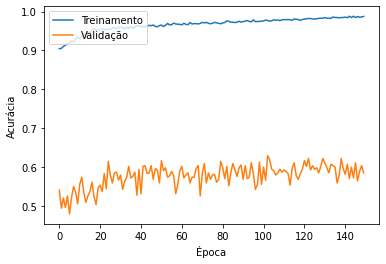

In [142]:
#Construção do gráfico 2D para avaliar a acurácia em relação à época de todos os modelos gerados:

# summarize history for accuracy
plt.plot(media_h11)
plt.plot(vmedia_h11)
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['Treinamento', 'Validação'], loc='upper left')
plt.show()


# summarize history for loss
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
#plt.title('model loss')
#plt.ylabel('loss')
#plt.xlabel('epoch')
#plt.legend(['Treinamento', 'Validação'], loc='upper left')
#plt.show()